<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png?sfvrsn=764583a6_0' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Name: Shannon Yum Wan Ning (S10223327G)
Class: ML_P03

In [1]:
# import the required packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt

# sklearn preprocess
from sklearn.model_selection import train_test_split

# the scaler 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots (Numerical Transformation)
import scipy.stats as stats # distribution of variables

# feature engine
import feature_engine.imputation as mdi
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder, CountFrequencyEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer, ReciprocalTransformer, PowerTransformer, YeoJohnsonTransformer, ReciprocalTransformer, BoxCoxTransformer

## 1. HR Analytics

Objective: Appply ML in identifying machine learning modelling in identifying whether the employee will be promoted or not

information: hr_data.csv contains employee personal information, education background, past performance and etc. Detailed information can be found in the below table. You can utilize all these variables to make prediction on whether the employee will be promoted or not.

is_promoted (TARGET)

### 1.1 Load and Explore the data

In [2]:
# Load dataset into a DataFrame
df = pd.read_csv('hr_data.csv')

# Create a copy of the DataFrame
df_new = df.copy()

# Show overview of the dataset
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Looking at the the concise summary of the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


From the summary above, all columns except 'education' and 'previous_year_rating'. Whereby 'education' has about 2409 blank and 'previous_year_rating' has about 4124 blanks. We will need to use statistical techniques to fill in those blanks later on. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

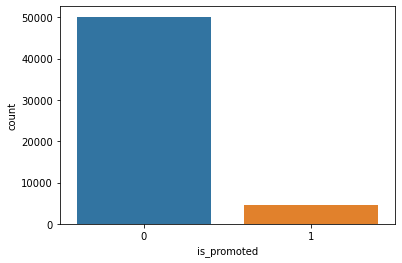

In [4]:
# comparing the difference between those who are promoted and those who are not 
sns.countplot(df_new.is_promoted)
# since there is a big difference between those who are promoted and not_promoted, we will need to use stratified sampling

In [5]:
# Stratified Sampling

In [6]:
df['is_promoted'].value_counts() 
# is_promoted is to see if person gets promoted so 0 or 1, will get skewed outcome as not many will usually get promoted = more 0 
# biased scope

0    50140
1     4668
Name: is_promoted, dtype: int64

In [7]:
# create df for those rows that are 0
df0=df[df['is_promoted']==0]
df0.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# create df for those rows that are 1
df1=df[df['is_promoted']==1]
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1


In [9]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df0_sampled.info() # check no of columns and compare with 1 to match no of columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4438 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4305 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [10]:
df_new=pd.concat([df1,df0_sampled],axis=0)
df_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             8984 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8634 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [12]:
df_new.describe()
# from here, we can immediately identify the numerical columns 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,8634.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,38869.959940,1.228685,34.596937,3.626940,5.759533,0.508569,0.066945,67.104863,0.500000
std,22642.619782,0.567723,7.449845,1.211617,4.146011,0.499953,0.249940,14.569584,0.500027
min,15.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,0.000000
25%,19135.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,38955.500000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,65.000000,0.500000
75%,58222.750000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000
max,78292.000000,7.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


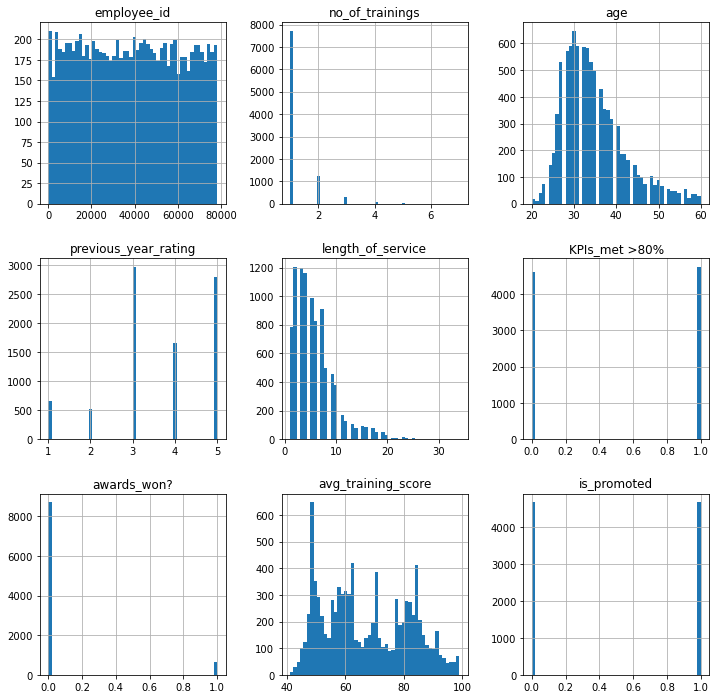

In [13]:
df_new.hist(bins=50, figsize=(12,12))
plt.show()
# only age looks the most normal, 
#KPI & year_rating & awards_won are disticnt values 
# avg_training_score has staggering data 
# and length_of_service is right side skewed 

#### Numerical Data

In [14]:
# numeric data
df_num = df_new.select_dtypes(['int64', 'float64']).copy()
df_num.head()
# looking at the first 5 rows from each numerical columns 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,1,35,5.0,3,1,0,50,1
39,58304,1,33,5.0,6,1,0,51,1
60,17673,1,50,4.0,17,1,0,47,1
66,77981,1,27,NaN,1,1,1,58,1
67,16502,1,27,NaN,1,0,0,61,1


In [15]:
df_num.nunique()

employee_id             9336
no_of_trainings            7
age                       41
previous_year_rating       5
length_of_service         33
KPIs_met >80%              2
awards_won?                2
avg_training_score        59
is_promoted                2
dtype: int64

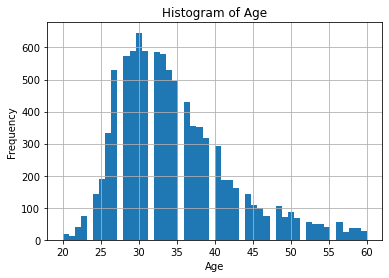

In [16]:
# Visualize Age Only 
plt.hist(df_num['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age')
plt.grid(True)

plt.show()
# although it is a numerical column, there are distinct groups (ordinal)

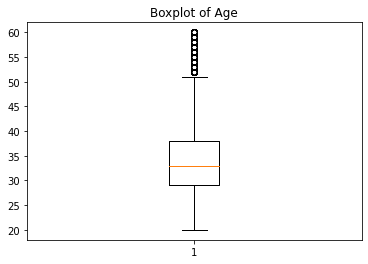

In [17]:
# using boxplot to show how distributions of 'age' values differ 
plt.boxplot(df_num['age'])
plt.title('Boxplot of Age')
plt.show()
# a lot of outliers, unless this visualisation is not a good representation of "age"

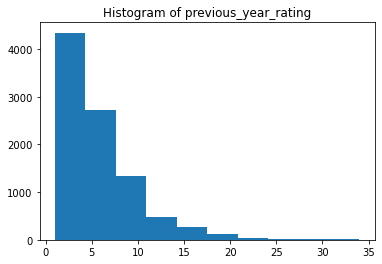

In [18]:
# Looking at Previous_year_rating 
plt.hist(df_num['length_of_service'])
plt.title('Histogram of previous_year_rating')
plt.show()
# very right skewed 

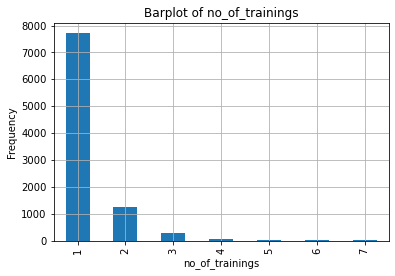

In [19]:
# visualize no_of_trainings
df_num.no_of_trainings.value_counts().plot.bar()
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Barplot of no_of_trainings')
plt.grid(True)
plt.show()

Text(0, 0.5, 'length_of_service')

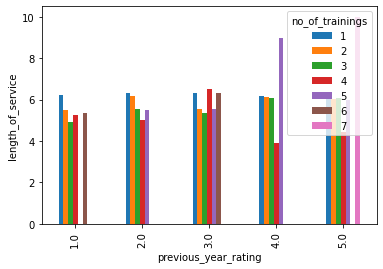

In [20]:
# exploring previous_year_rating and no_of_trainings
df_new.groupby(['no_of_trainings','previous_year_rating']).length_of_service.mean().unstack(0).plot.bar()
plt.ylabel('length_of_service')
# no of training is highest [10] but rating is the lowest at 1.0

#### Categorical Data

In [21]:
# categorical data
df_cat = df_new.select_dtypes(['object']).copy()
df_cat.head()

,department,region,education,gender,recruitment_channel
11,Sales & Marketing,region_7,Bachelor's,f,sourcing
39,Sales & Marketing,region_28,Bachelor's,m,sourcing
60,Sales & Marketing,region_4,Master's & above,m,other
66,Finance,region_22,Bachelor's,m,other
67,Sales & Marketing,region_22,Bachelor's,m,sourcing


In [22]:
# describing the data 
df_cat.describe()
# education has NaNs 

,department,region,education,gender,recruitment_channel
count,9336,9336,8984,9336,9336
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,2618,2026,6123,6494,5153


In [23]:
# confirming the number of unique elements in each column 
df_cat.nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

In [24]:
for col in df_cat.columns:
    if df_cat[col].dtypes == 'object':
        print(col, df_cat[col].unique())

department ['Sales & Marketing' 'Finance' 'Analytics' 'Technology' 'Legal'
 'Operations' 'Procurement' 'R&D' 'HR']
region ['region_7' 'region_28' 'region_4' 'region_22' 'region_31' 'region_2'
 'region_11' 'region_15' 'region_13' 'region_23' 'region_25' 'region_34'
 'region_5' 'region_17' 'region_20' 'region_12' 'region_26' 'region_1'
 'region_14' 'region_29' 'region_32' 'region_3' 'region_16' 'region_6'
 'region_27' 'region_21' 'region_8' 'region_19' 'region_10' 'region_33'
 'region_30' 'region_24' 'region_18' 'region_9']
education ["Bachelor's" "Master's & above" nan 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']


In [1]:
# visualize department 
df_cat.department.value_counts().plot.bar()
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Barplot of department')
plt.grid(True)
plt.show()
# Sales and Marketing most common department 

SyntaxError: invalid syntax (Temp/ipykernel_22708/693625528.py, line 7)

Text(0, 0.5, 'length_of_service')

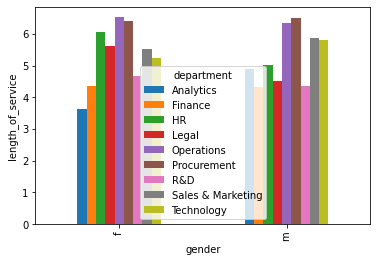

In [26]:
# exploring gender and education 
df_new.groupby(['department','gender']).length_of_service.mean().unstack(0).plot.bar()
plt.ylabel('length_of_service')

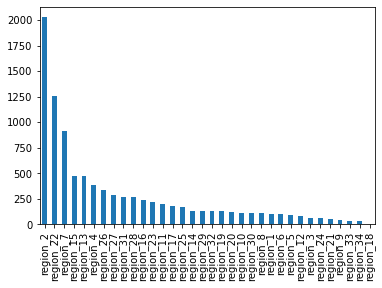

In [27]:
# visualize region 
df_cat.region.value_counts().plot.bar()
plt.show()
# region 2 

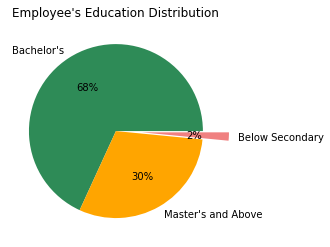

In [28]:
values = df_cat["education"].value_counts()
colors = ['seagreen','orange', 'lightcoral']
explode = [0, 0, 0.3] # specifies the fraction of the radius with which to offset each wedge
labels = ["Bachelor's","Master's and Above","Below Secondary"]
plt.pie(values, colors= colors, labels=labels, autopct='%.0f%%', explode = explode)
plt.title("Employee's Education Distribution")
plt.show()

<AxesSubplot:xlabel='education'>

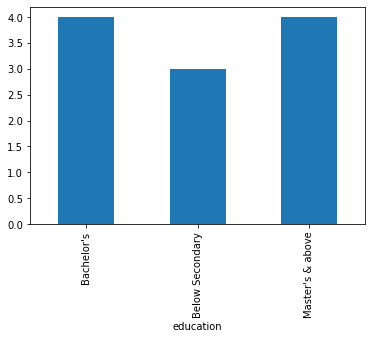

In [29]:
# visualize education by average previous year rating
# from the graph, rating and education has a linear relation
#calculate sum of values by group
df_ratingBy_education = df_new.groupby(['education'])['previous_year_rating'].median()

#create bar plot by group
df_ratingBy_education.plot(kind='bar')

In [30]:
# can still have categorical data 

### 1.2 Cleanse and Transform the data

#### Data Cleansing

In [31]:
df_new.isnull().sum()

employee_id               0
department                0
region                    0
education               352
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    702
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [32]:
# going to try to retain the columns with a new value 
def fillna(df,column,value):
    df[column].fillna(value,inplace=True)
    return df

In [33]:
# dealing with missing values in "education" columns 
df_new = fillna(df_new,"education","Unknown")
# NaNs in education should have been changed to "Unknown"

In [34]:
# dealing with missing values in "previous_year_rating" columns 
df_new = fillna(df_new,"previous_year_rating",0.0)
# NaNs in previous_year should have been changed to 0.0

In [35]:
# checking if there are still any missing data left 
df_new.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [36]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,0.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,0.0,1,0,0,61,1


In [37]:
# dropping only this column now 
df_new = df_new.drop(['employee_id'], axis=1)

In [38]:
# checking if the employee_id still there
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,Finance,region_22,Bachelor's,m,other,1,27,0.0,1,1,1,58,1
67,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,0.0,1,0,0,61,1


In [39]:
# overview of the gender unique value count distribution
df_new['gender'].value_counts()

m    6494
f    2842
Name: gender, dtype: int64

In [40]:
# mapping the f and m to binary 
gender_map = {"f": 0, "m": 1}
df_new['gender'] = df_new['gender'].map(gender_map).astype(int)
df_new['gender'].head(20)

11     0
39     1
60     1
66     1
67     1
69     1
71     1
75     1
79     1
84     1
85     0
88     1
100    1
105    1
113    0
116    1
118    0
121    1
122    1
133    1
Name: gender, dtype: int32

In [41]:
# relook at the gender column again, should be binary 
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,Sales & Marketing,region_7,Bachelor's,0,sourcing,1,35,5.0,3,1,0,50,1
39,Sales & Marketing,region_28,Bachelor's,1,sourcing,1,33,5.0,6,1,0,51,1
60,Sales & Marketing,region_4,Master's & above,1,other,1,50,4.0,17,1,0,47,1
66,Finance,region_22,Bachelor's,1,other,1,27,0.0,1,1,1,58,1
67,Sales & Marketing,region_22,Bachelor's,1,sourcing,1,27,0.0,1,0,0,61,1


In [42]:
df_new.info()
# relooking at the rundown of the data types of each column in preparation to Data Transformation
# department, region, education, recruitment_channel are categorical 
# rest are numerical 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   object 
 1   region                9336 non-null   object 
 2   education             9336 non-null   object 
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   object 
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   int64  
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 984.7+ KB


#### Data Transformation 

##### Encoding Categorical Data 

In [43]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop(labels=['is_promoted'], axis=1),  # predictors
    df_new['is_promoted'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((6535, 12), (2801, 12))

In [44]:
# using one hot encoding for the categorical data (method #1)

In [45]:
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

# drop_last --> 3 categories as the last value represents as what is not presented (A: 0,1 . B:1,0 . 
# then C can be represented as either 1,1 or 0,0)

In [46]:
# fit the encoder to the train set: it will learn the variables and  
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [47]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [48]:
# let's transform train and test set

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [49]:
# let's inspect the encoded test set

X_test_enc.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_HR,department_Sales & Marketing,...,region_region_21,region_region_1,region_region_3,region_region_9,region_region_12,education_Master's & above,education_Bachelor's,education_Unknown,recruitment_channel_other,recruitment_channel_sourcing
2895,1,1,33,3.0,4,1,0,86,0,0,...,0,0,0,0,0,0,1,0,0,1
19295,0,1,28,0.0,1,1,0,90,0,0,...,0,0,0,0,0,0,1,0,0,1
6067,1,1,28,0.0,1,1,0,70,0,0,...,0,0,0,0,0,0,1,0,1,0
15910,1,1,28,3.0,3,0,0,66,0,0,...,0,0,0,0,0,0,1,0,1,0
51120,0,1,34,3.0,4,1,0,79,0,0,...,0,0,0,0,0,1,0,0,1,0


In [50]:
# Check your OHE columns are aligned for both Train and Test Datasets
# avoiding downstream errors 
list(X_train_enc.columns) == list(X_test_enc.columns)

True

One hot encoding creates too many columns for 'region' especially since this column contains a large number of categories. I can try label or ordinal encoding and even frequency encoding as an alternative. 

In [51]:
# ordinal encoding [method #2]

In [52]:
# make a list with the categorical variables
# remaining categorical data as been identified above with .info()
vars_categorical = ['education','recruitment_channel']

In [53]:
# let's create the encoder


# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=vars_categorical)

In [54]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['education', 'recruitment_channel'])

In [55]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['education', 'recruitment_channel']

In [56]:
# in the encoder dict we can observe the numbers --> see how each variable is encoded 
# assigned to each category for all the indicated variables, this is ordered 

ordinal_enc.encoder_dict_

{'education': {'Unknown': 0,
  "Bachelor's": 1,
  'Below Secondary': 2,
  "Master's & above": 3},
 'recruitment_channel': {'other': 0, 'sourcing': 1, 'referred': 2}}

In [57]:
# let's transform the train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [58]:
# let's explore the result

X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
46134,HR,region_2,3,0,0,1,44,5.0,5,0,0,50
39664,Sales & Marketing,region_7,3,0,0,1,36,4.0,4,1,0,50
16779,Sales & Marketing,region_7,1,1,1,2,31,4.0,5,1,0,53
43651,Operations,region_28,1,1,0,1,29,3.0,4,0,0,61
15117,Sales & Marketing,region_7,1,1,0,1,30,4.0,7,0,0,51


In [59]:
# Check your ordinal columns are aligned for both Train and Test Datasets
# avoiding downstream errors 
list(X_train.columns) == list(X_test.columns)

True

In [60]:
# using frequencey encoder for the rest of the categorical data

In [61]:
# let's create an encoder

freq_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=None)

In [62]:
# fit the encoder to the train set
freq_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency')

In [63]:
# the encoder stores the variables it will encode

freq_enc.variables

In [64]:
# in the encoder dict contains the counts or frequencies
# per category per variable

freq_enc.encoder_dict_

{'department': {'Sales & Marketing': 0.27850038255547055,
  'Operations': 0.21606732976281562,
  'Technology': 0.14506503442999236,
  'Procurement': 0.14200459066564652,
  'Analytics': 0.10512624330527927,
  'Finance': 0.04529456771231829,
  'HR': 0.035807192042846214,
  'R&D': 0.017750573833205815,
  'Legal': 0.014384085692425401},
 'region': {'region_2': 0.21683244070390206,
  'region_22': 0.13465952563121653,
  'region_7': 0.09961744452945677,
  'region_13': 0.05080336648814078,
  'region_15': 0.05003825554705432,
  'region_4': 0.041162968630451414,
  'region_26': 0.034889058913542464,
  'region_27': 0.03182861514919663,
  'region_31': 0.028309104820198928,
  'region_28': 0.027850038255547053,
  'region_16': 0.025554705432287682,
  'region_23': 0.02325937260902831,
  'region_11': 0.021117061973986228,
  'region_17': 0.01928079571537873,
  'region_25': 0.01928079571537873,
  'region_32': 0.014078041315990818,
  'region_14': 0.013925019127773526,
  'region_30': 0.013618974751338945,
 

In [65]:
# let's transform train and test sets

X_train_enc = freq_enc.transform(X_train)
X_test_enc = freq_enc.transform(X_test)

In [66]:
X_test_enc.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
2895,0.105126,0.216832,1,1,1,1,33,3.0,4,1,0,86
19295,0.145065,0.134660,1,0,1,1,28,0.0,1,1,0,90
6067,0.142005,0.023259,1,1,0,1,28,0.0,1,1,0,70
15910,0.216067,0.025555,1,1,0,1,28,3.0,3,0,0,66
51120,0.145065,0.013619,3,0,0,1,34,3.0,4,1,0,79


In [67]:
# Check your freq columns are aligned for both Train and Test Datasets
# avoiding downstream errors 
list(X_train_enc.columns) == list(X_test_enc.columns)
X_train_enc.shape, X_test_enc.shape

((6535, 12), (2801, 12))

In [68]:
# checking to see if all categorical data is successfully encoded

In [69]:
X_train_enc.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
46134,0.035807,0.216832,3,0,0,1,44,5.0,5,0,0,50
39664,0.278500,0.099617,3,0,0,1,36,4.0,4,1,0,50
16779,0.278500,0.099617,1,1,1,2,31,4.0,5,1,0,53
43651,0.216067,0.027850,1,1,0,1,29,3.0,4,0,0,61
15117,0.278500,0.099617,1,1,0,1,30,4.0,7,0,0,51


In [70]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6535 entries, 46134 to 32564
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            6535 non-null   float64
 1   region                6535 non-null   float64
 2   education             6535 non-null   int64  
 3   gender                6535 non-null   int32  
 4   recruitment_channel   6535 non-null   int64  
 5   no_of_trainings       6535 non-null   int64  
 6   age                   6535 non-null   int64  
 7   previous_year_rating  6535 non-null   float64
 8   length_of_service     6535 non-null   int64  
 9   KPIs_met >80%         6535 non-null   int64  
 10  awards_won?           6535 non-null   int64  
 11  avg_training_score    6535 non-null   int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 638.2 KB


##### Transforming Numerical Variables 

In [71]:
df_combined = pd.concat([X_train_enc, X_test_enc])
extracted_target = df_new["is_promoted"]
df_combined = df_combined.join(extracted_target)

In [72]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 46134 to 40315
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   float64
 1   region                9336 non-null   float64
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   int64  
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 1.2 MB


In [73]:
# reordered the rows to match the original for better comparison
df_combined.reset_index(drop=True, inplace=True)

In [74]:
df_combined.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.035807,0.216832,3,0,0,1,44,5.0,5,0,0,50,0
1,0.278500,0.099617,3,0,0,1,36,4.0,4,1,0,50,1
2,0.278500,0.099617,1,1,1,2,31,4.0,5,1,0,53,1
3,0.216067,0.027850,1,1,0,1,29,3.0,4,0,0,61,0
4,0.278500,0.099617,1,1,0,1,30,4.0,7,0,0,51,0
5,0.278500,0.003826,1,1,1,1,29,1.0,5,0,0,48,0
6,0.278500,0.050803,1,1,0,1,29,3.0,2,0,0,54,0
7,0.216067,0.028309,3,0,0,1,34,3.0,3,1,0,59,1
8,0.278500,0.099617,3,1,0,1,44,5.0,16,1,0,47,0
9,0.142005,0.028309,3,0,0,1,32,5.0,4,1,0,70,0


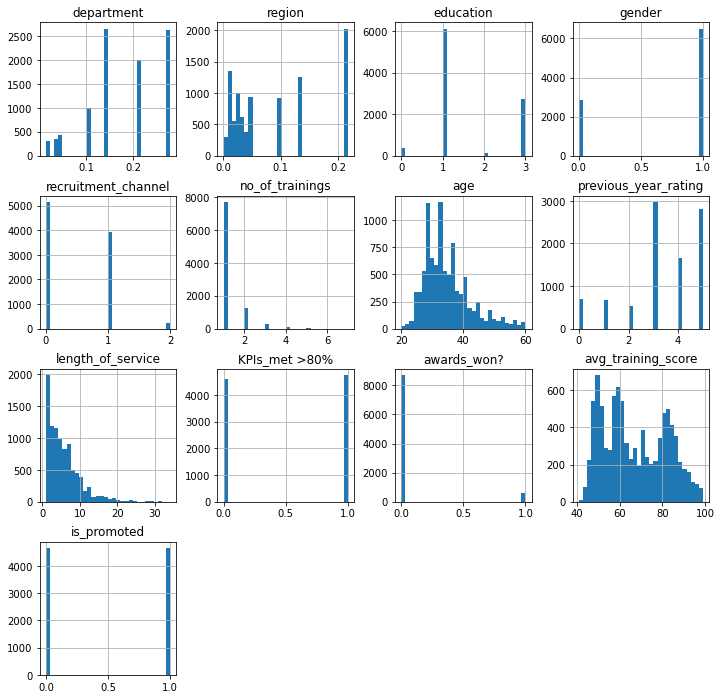

In [75]:
# plot the histogram to inspect variable distributions (not in book)
# choosing which ones are appliable to apply transformation on
df_combined.hist(bins=30, figsize=(12,12))
plt.show()

In [76]:
# using logarithm transformation on age, length_of_service, avg_training_score
# can only be applied to positive variables (method #1)

In [77]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# degree of skewness can be calculated using this def
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

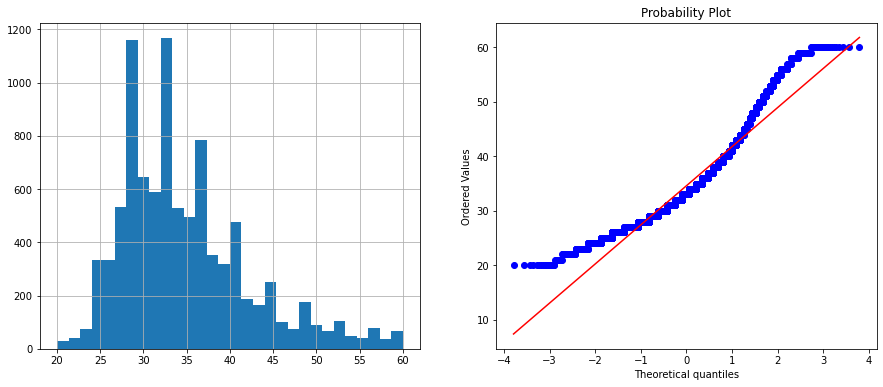

In [78]:
#checking original distribution 
diagnostic_plots(df_combined, 'age')

In [79]:
# initialize the transformer
lt = LogTransformer(variables=['age']) # numerical columns that we want to perform transformation on

# fit transformer to data set
lt.fit(df_combined)

LogTransformer(variables=['age'])

In [80]:
# transform variables within our data set
data_tf = lt.transform(df_combined) # entire distribution of whole numerical column so no need for split test train 

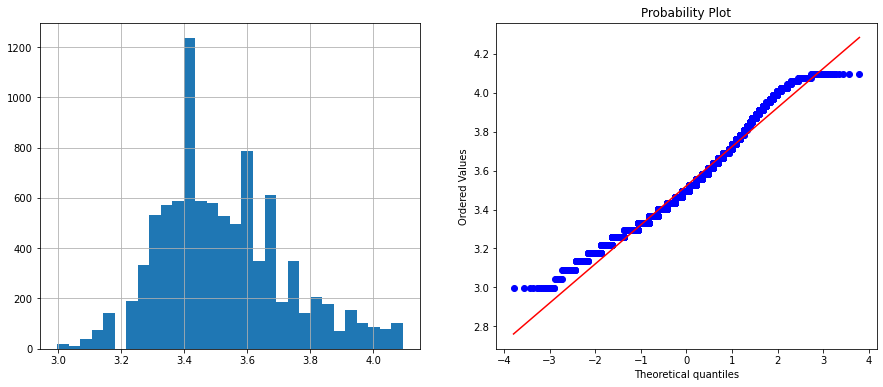

In [81]:
diagnostic_plots(data_tf, 'age')
#almost normal distribution

In [82]:
# Reciprocal Transformer(method #2)

In [83]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['age'])

# fit transformer to the entire dataframe
rt.fit(df_combined)

ReciprocalTransformer(variables=['age'])

In [84]:
# transform the indicated variables within our data set
data_rt = rt.transform(df_combined)

In [85]:
# looking at the effects of the transformer 

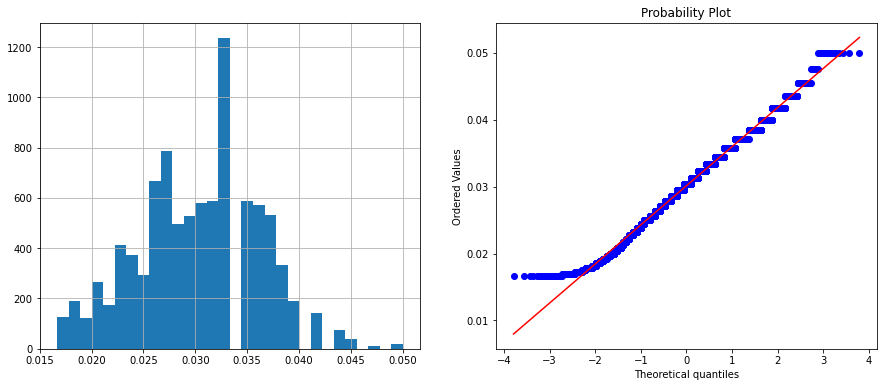

In [86]:
diagnostic_plots(data_rt, 'age')
# almost normal but more staggered data with this transformer 

In [87]:
# power transformer (method #3)

In [88]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['age'], exp=0.3)

# fit transformer to data
et.fit(df_combined)

PowerTransformer(exp=0.3, variables=['age'])

In [89]:
# transform indicated variables in the dataset
data_pow = et.transform(df_combined)

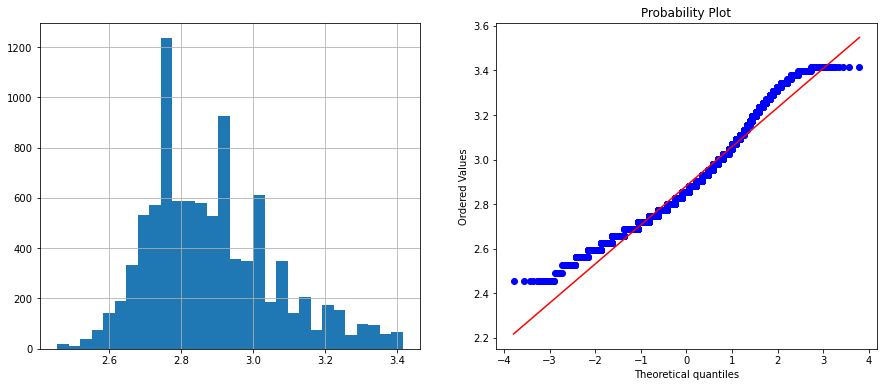

In [90]:
diagnostic_plots(data_pow, 'age')
# a little change to the distribution to age 

In [91]:
# box cox transformation (method #4)

In [92]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['age'])

# fit transformer to the data set
bct.fit(df_combined)

BoxCoxTransformer(variables=['age'])

In [93]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_bct = bct.transform(df_combined)

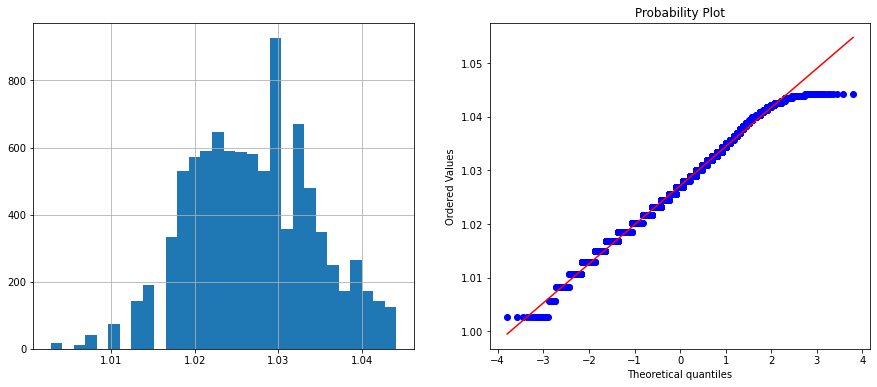

In [94]:
diagnostic_plots(data_bct, 'age')
#very close to normal 

In [95]:
# square cube root transformer (method #5)

In [96]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['age'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(df_combined)

PowerTransformer(exp=0.3333333333333333, variables=['age'])

In [97]:
# transform indicated variables within our dataframe
data_et = et.transform(df_combined)

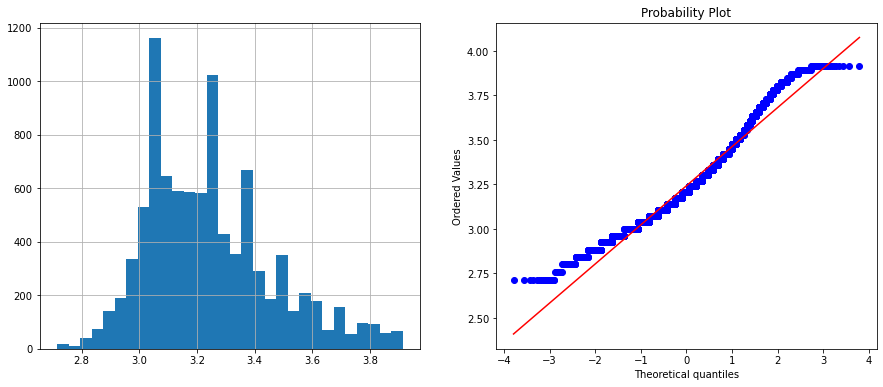

In [98]:
diagnostic_plots(data_et, 'age')
# almost normal 

Decided to use boc cox transformed data for age column only. I did not transform any other columns for the final report because all of the transformation techniques, in one way or another caused large chunks of data to be spread far apart or look completely gone. Another case is that the transformer has no effect on the column at all, even after putting it through different transformers

Example: 
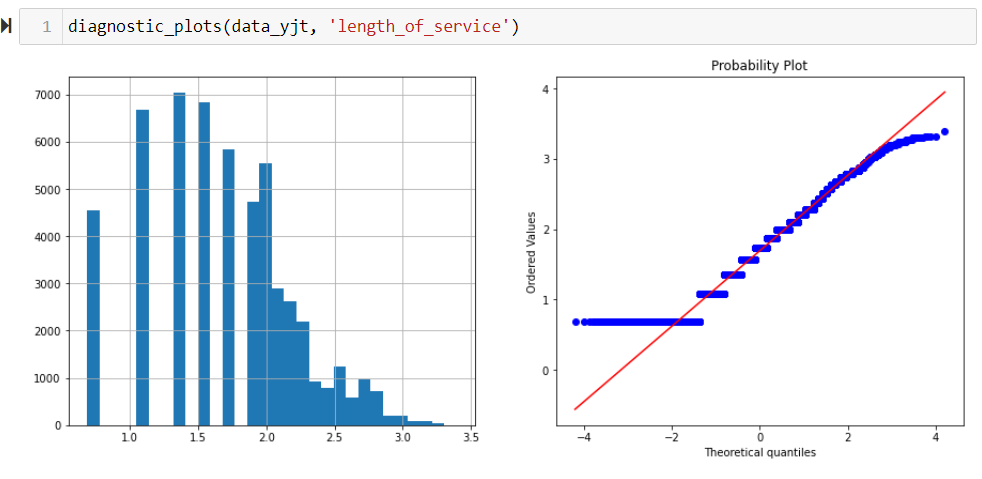

Example: 
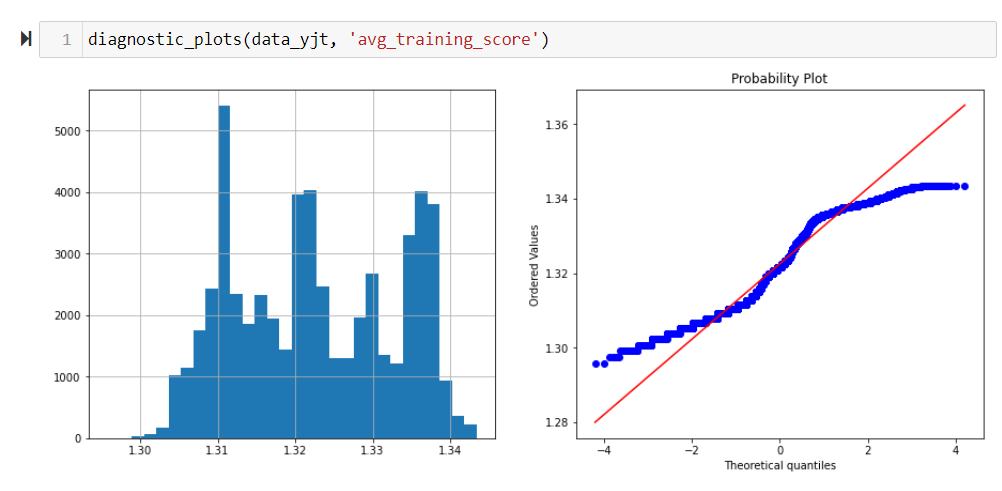

In [99]:
# checking the new set of data 
data_bct.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.035807,0.216832,3,0,0,1,1.036373,5.0,5,0,0,50,0
1,0.278500,0.099617,3,0,0,1,1.030006,4.0,4,1,0,50,1
2,0.278500,0.099617,1,1,1,2,1.024420,4.0,5,1,0,53,1
3,0.216067,0.027850,1,1,0,1,1.021664,3.0,4,0,0,61,0
4,0.278500,0.099617,1,1,0,1,1.023087,4.0,7,0,0,51,0


In [100]:
data_bct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   float64
 1   region                9336 non-null   float64
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 911.8 KB


##### Dealing wit Outliers 

In [101]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Columnm quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


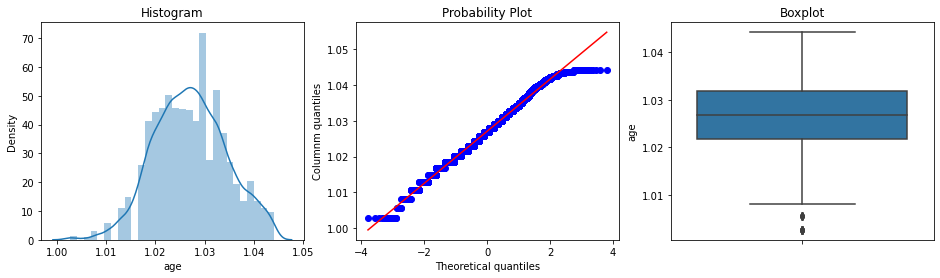

In [102]:
# let's find outliers in age

diagnostic_plots(data_bct, 'age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


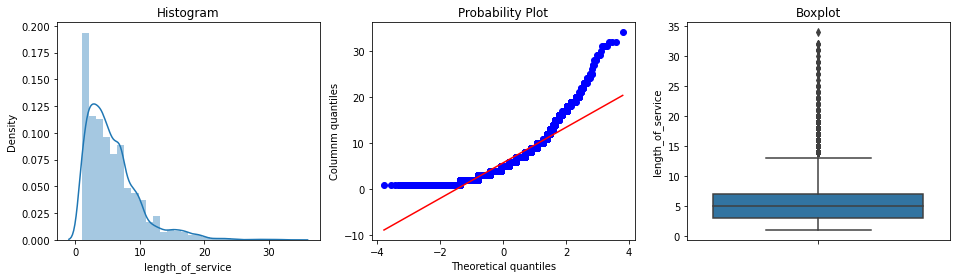

In [103]:
diagnostic_plots(data_bct, 'length_of_service')

In [104]:
# create the capper

windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['age','length_of_service'])

windsorizer.fit(data_bct)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['age', 'length_of_service'])

In [105]:
data_t = windsorizer.transform(data_bct)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


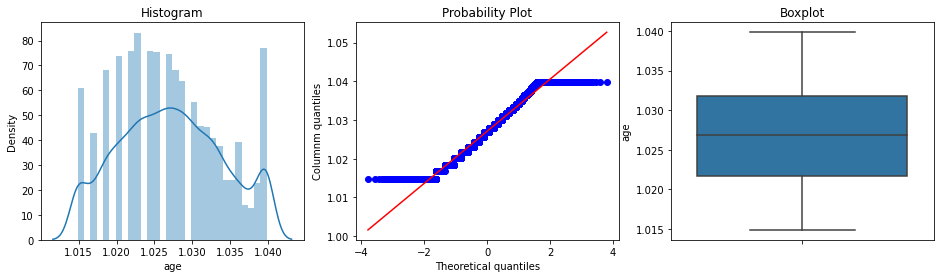

In [106]:
# examining the changes 
diagnostic_plots(data_t, 'age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


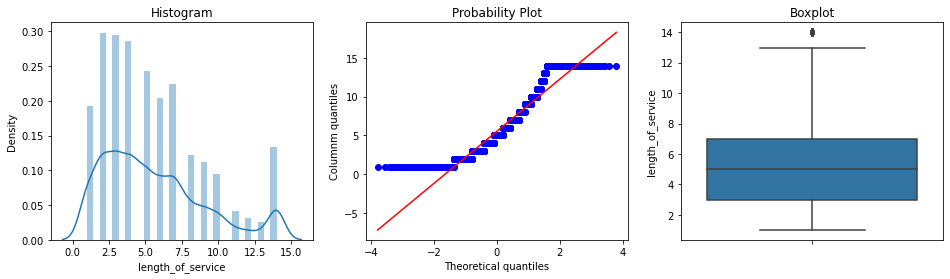

In [107]:
# examining the changes 
diagnostic_plots(data_t, 'length_of_service')

In [108]:
# length of service still had a little outliers --> might be true outliers in the data 

### 1.3 Correlation Analysis

In [109]:
# columns should all be numeric already for this step to happen

In [110]:
# drop like only employee id --> need to explain why 

In [111]:
df_final = data_t.copy()

In [112]:
df_final.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.035807,0.216832,3,0,0,1,1.036373,5.0,5.0,0,0,50,0
1,0.278500,0.099617,3,0,0,1,1.030006,4.0,4.0,1,0,50,1
2,0.278500,0.099617,1,1,1,2,1.024420,4.0,5.0,1,0,53,1
3,0.216067,0.027850,1,1,0,1,1.021664,3.0,4.0,0,0,61,0
4,0.278500,0.099617,1,1,0,1,1.023087,4.0,7.0,0,0,51,0
5,0.278500,0.003826,1,1,1,1,1.021664,1.0,5.0,0,0,48,0
6,0.278500,0.050803,1,1,0,1,1.021664,3.0,2.0,0,0,54,0
7,0.216067,0.028309,3,0,0,1,1.027963,3.0,3.0,1,0,59,1
8,0.278500,0.099617,3,1,0,1,1.036373,5.0,14.0,1,0,47,0
9,0.142005,0.028309,3,0,0,1,1.025672,5.0,4.0,1,0,70,0


In [113]:
df_final['length_of_service'] = df_final['length_of_service'].astype(int)

In [114]:
df_final['length_of_service'].unique()

array([ 5,  4,  7,  2,  3, 14,  6,  8,  1, 10,  9, 13, 12, 11])

In [115]:
df_final.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.035807,0.216832,3,0,0,1,1.036373,5.0,5,0,0,50,0
1,0.278500,0.099617,3,0,0,1,1.030006,4.0,4,1,0,50,1
2,0.278500,0.099617,1,1,1,2,1.024420,4.0,5,1,0,53,1
3,0.216067,0.027850,1,1,0,1,1.021664,3.0,4,0,0,61,0
4,0.278500,0.099617,1,1,0,1,1.023087,4.0,7,0,0,51,0
5,0.278500,0.003826,1,1,1,1,1.021664,1.0,5,0,0,48,0
6,0.278500,0.050803,1,1,0,1,1.021664,3.0,2,0,0,54,0
7,0.216067,0.028309,3,0,0,1,1.027963,3.0,3,1,0,59,1
8,0.278500,0.099617,3,1,0,1,1.036373,5.0,14,1,0,47,0
9,0.142005,0.028309,3,0,0,1,1.025672,5.0,4,1,0,70,0


In [116]:
df_final.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,0.180271,0.089866,1.560411,0.695587,0.473329,1.228685,1.027149,3.354220,5.554627,0.508569,0.066945,67.104863,0.500000
std,0.080240,0.077855,0.951414,0.460183,0.547611,0.567723,0.006821,1.507474,3.509634,0.499953,0.249940,14.569584,0.500027
min,0.014384,0.000306,0.000000,0.000000,0.000000,1.000000,1.014878,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000
25%,0.142005,0.023259,1.000000,0.000000,0.000000,1.000000,1.021664,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,0.145065,0.050038,1.000000,1.000000,0.000000,1.000000,1.026851,3.000000,5.000000,1.000000,0.000000,65.000000,0.500000
75%,0.278500,0.134660,3.000000,1.000000,1.000000,1.000000,1.031841,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000
max,0.278500,0.216832,3.000000,1.000000,2.000000,7.000000,1.039847,5.000000,14.000000,1.000000,1.000000,99.000000,1.000000


In [117]:
df_final.info()
# all columns are numerical now 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   float64
 1   region                9336 non-null   float64
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int32  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 875.4 KB


Data Dictionary : 

* **is_promoted (TARGET):** 0 = No, 1 = Yes
* **department:** normalised to 0 ~ 1, department of employee
* **region:** normalised to 0 ~ 1, i.e. the percentile of the region which employee is employed at
* **education:** (employee's education level): 'Unknown': 0, 'Below Secondary': 1, "Bachelor's": 2, "Master's & above": 3
* **gender:** Gender of Employee, 0 = Female, 1 = Male
* **recruitment_channel:** 'other': 0, 'sourcing': 1, 'referred': 2
* **no_of_trainings:** number of other trainings attended in previous year on soft skills, technical skills etc., categorized from 1 ~ 7
* **age:** normalised to 0 ~ 1, i.e. the percentile of the employees' age
* **previous_year_rating:** employees' last year rating, categorized from 1 ~ 5 
* **length_of_service:** number of years in service with the company, categorized from 1 ~ 13 years
* **KPIs_met >80%:** 0 = No, 1 = Yes 
* **awards_won?:** 0 = No, 1 = Yes 
* **avg_training_score:** average training score in current training evaluation, ranges from 40 ~ 90

In [118]:
# This shows the correlations between the variables
df_final.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.087793,-0.036832,0.052483,-0.011340,-0.026432,0.118418,-0.032236,0.091936,-0.043552,-0.004621,-0.488211,-0.009416
region,-0.087793,1.000000,0.039603,-0.099607,0.077443,0.071509,0.163785,0.001696,0.112261,0.020279,0.009649,0.018370,0.037517
education,-0.036832,0.039603,1.000000,-0.051702,-0.018188,-0.028455,0.422373,0.124712,0.270453,0.032468,0.014300,0.050505,0.061023
gender,0.052483,-0.099607,-0.051702,1.000000,0.020915,0.077464,-0.032809,-0.027534,-0.023795,-0.026376,0.006760,-0.021409,-0.021415
recruitment_channel,-0.011340,0.077443,-0.018188,0.020915,1.000000,-0.016387,-0.041199,0.016961,-0.028811,0.019029,-0.001433,0.018094,0.015844
no_of_trainings,-0.026432,0.071509,-0.028455,0.077464,-0.016387,1.000000,-0.078708,-0.056734,-0.046996,-0.034267,-0.020329,0.042947,-0.044717
age,0.118418,0.163785,0.422373,-0.032809,-0.041199,-0.078708,1.000000,0.229069,0.650703,-0.016037,0.001921,-0.063219,-0.016788
previous_year_rating,-0.032236,0.001696,0.124712,-0.027534,0.016961,-0.056734,0.229069,1.000000,0.232136,0.220051,0.051066,0.093384,0.227172
length_of_service,0.091936,0.112261,0.270453,-0.023795,-0.028811,-0.046996,0.650703,0.232136,1.000000,-0.046238,-0.056376,-0.035202,-0.004334
KPIs_met >80%,-0.043552,0.020279,0.032468,-0.026376,0.019029,-0.034267,-0.016037,0.220051,-0.046238,1.000000,0.038701,0.032562,0.380519


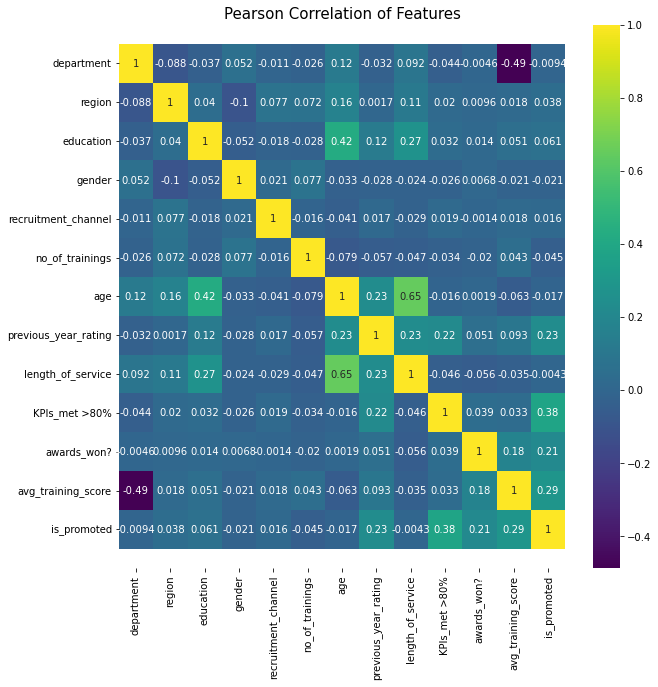

In [119]:
# Heatmap: the correlation between any two features/variables
# only for data understanding so do not use this as a basis to drop, try to just drop irrelevant columns beforehand 
# for assignments (not many features), just keep them, use model detail to drop when key values hav been identified
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_final.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

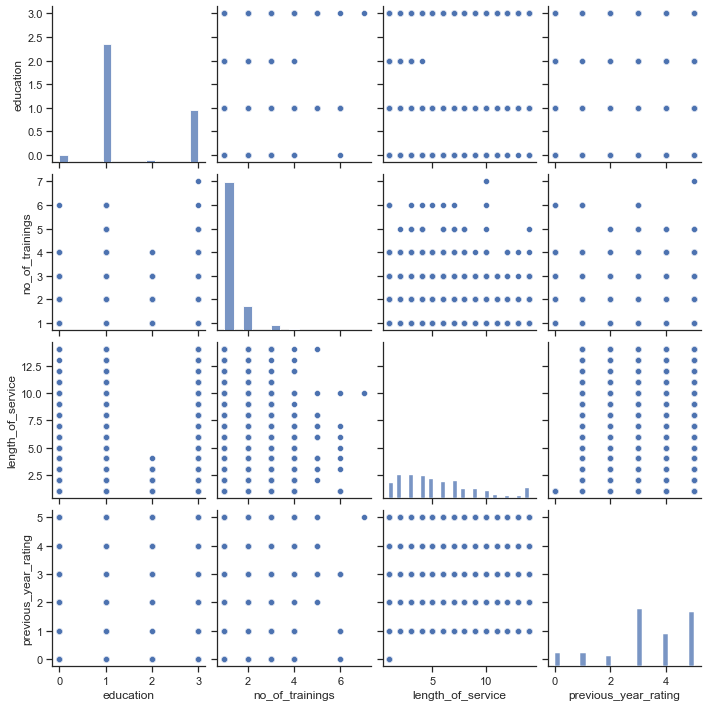

In [120]:
sns.set(style="ticks")
sns.pairplot(df_final[['education', 'no_of_trainings', 'length_of_service', 'previous_year_rating']])

### 1.4 Export the data

In [121]:
df_final.to_csv("hr_data_new.csv", encoding='utf-8', index=False)

## 2. Airbnb

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present 
more unique, personalized way of experiencing the world. 
This dataset (listings.csv) describes the listing activity and metrics from year 2013 to 2019. 

The data file includes the hosts information, the condition of listed properties, the reviews and etc.
Detailed information can be found in the below table. You can utilize all these variables to make 
predictions on the rental price of the listed properties.

price (TARGET)

### 2.1 Load and Explore the data

In [122]:
# Load dataset into a DataFrame
df = pd.read_csv('listings.csv')

# Create a copy of the DataFrame
df_airbnb = df.copy()

# Show overview of the dataset
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [123]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

2 rows missing for 'name' and many missing for 'last_review' and 'reviews_per_month'

In [124]:
# removing any possible duplicates 
df_airbnb.duplicated().sum()
df_airbnb.drop_duplicates(inplace=True)

In [125]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [126]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


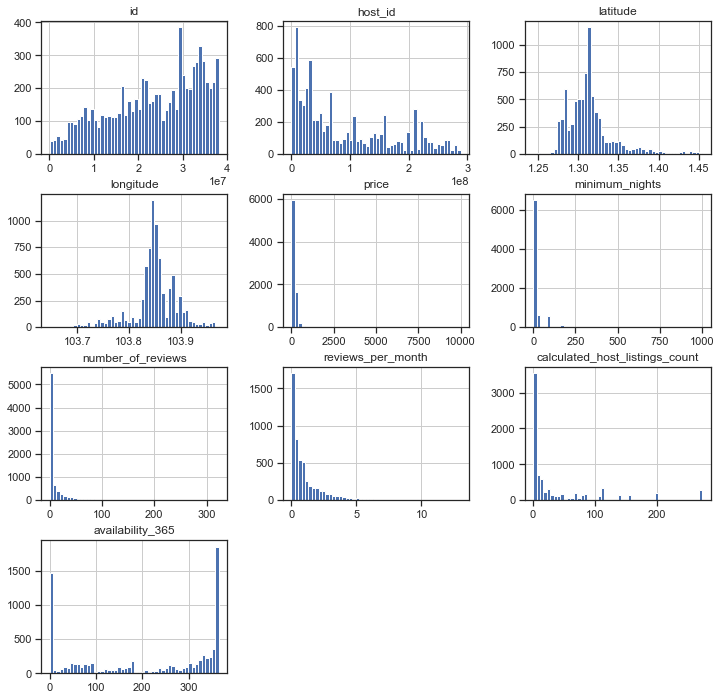

In [127]:
df_airbnb.hist(bins=50, figsize=(12,12))
plt.show()
# many of the columns are very skewed 

#### Numerical Data 

In [128]:
# numeric data
df_air_num = df_airbnb.select_dtypes(['int64', 'float64']).copy()
df_air_num.head()
# looking at the first 5 rows from each numerical columns 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,1.44255,103.79580,83,180,1,0.01,2,365
1,50646,227796,1.33235,103.78521,81,90,18,0.28,1,365
2,56334,266763,1.44246,103.79667,69,6,20,0.20,2,365
3,71609,367042,1.34541,103.95712,206,1,14,0.15,9,353
4,71896,367042,1.34567,103.95963,94,1,22,0.22,9,355


In [129]:
df_air_num.nunique()

id                                7907
host_id                           2705
latitude                          4885
longitude                         5414
price                              374
minimum_nights                      73
number_of_reviews                  208
reviews_per_month                  527
calculated_host_listings_count      55
availability_365                   359
dtype: int64

#### Categorical Data

In [130]:
# categorical data
df_air_cat = df_airbnb.select_dtypes(['object']).copy()
df_air_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


In [131]:
# describing the categorical data 
df_air_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


In [132]:
# confirming the number of unique elements in each column 
df_air_cat.nunique()

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

In [133]:
for col in df_air_cat.columns:
    if df_air_cat[col].dtypes == 'object':
        print(col, df_air_cat[col].unique())
# looking at the unqiue values of each categorical column 

name ['COZICOMFORT LONG TERM STAY ROOM 2' 'Pleasant Room along Bukit Timah'
 'COZICOMFORT' ... '[ Farrer Park ] New City Fringe CBD Mins to MRT'
 'Cheap Master Room in Central of Singapore'
 'Amazing room with private bathroom walk to Orchard']
host_name ['Francesca' 'Sujatha' 'Belinda' ... 'Jolene' 'Ryokuka' 'Bo']
neighbourhood_group ['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']
neighbourhood ['Woodlands' 'Bukit Timah' 'Tampines' 'Bedok' 'Bukit Merah' 'Newton'
 'Geylang' 'River Valley' 'Jurong West' 'Rochor' 'Queenstown' 'Serangoon'
 'Marine Parade' 'Pasir Ris' 'Toa Payoh' 'Outram' 'Punggol' 'Tanglin'
 'Hougang' 'Kallang' 'Novena' 'Downtown Core' 'Bukit Panjang'
 'Singapore River' 'Orchard' 'Ang Mo Kio' 'Bukit Batok' 'Museum'
 'Sembawang' 'Choa Chu Kang' 'Central Water Catchment' 'Sengkang'
 'Clementi' 'Jurong East' 'Bishan' 'Yishun' 'Mandai' 'Southern Islands'
 'Sungei Kadut' 'Western Water Catchment' 'Tuas' 'Marina South'
 'Lim Chu Kang']
room_ty

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1008x720 with 0 Axes>

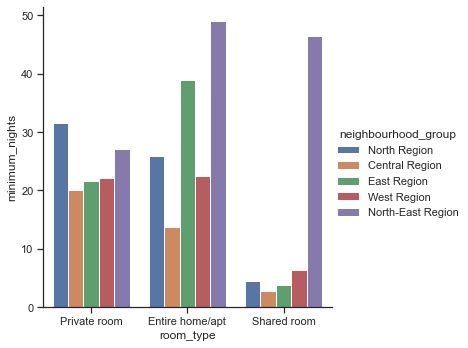

In [134]:
plt.figure(figsize=(14, 10))
sns.factorplot(x='room_type', y='minimum_nights', hue= 'neighbourhood_group', data=df_airbnb, kind='bar', ci=None)

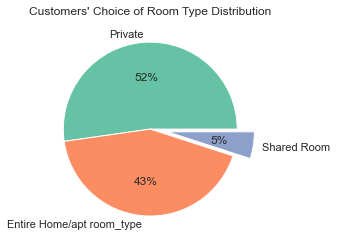

In [135]:
data = df_airbnb['room_type'].value_counts()
labels = ["Private","Entire Home/apt room_type","Shared Room"]
#define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:5]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=[0,0,0.2])
plt.title("Customers' Choice of Room Type Distribution")
plt.show()

In [4]:
# looking at the price distribution across neighborhood grps by room type 
plt.figure(figsize=(14, 7))
sns.barplot(df_airbnb.neighbourhood_group, df_airbnb.price, hue=df_airbnb.room_type, ci=None)
# # entire home/apt is the highest out of all the room types 
# west region is the most expensive to live in 
# north east is the cheapest

NameError: name 'fig' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

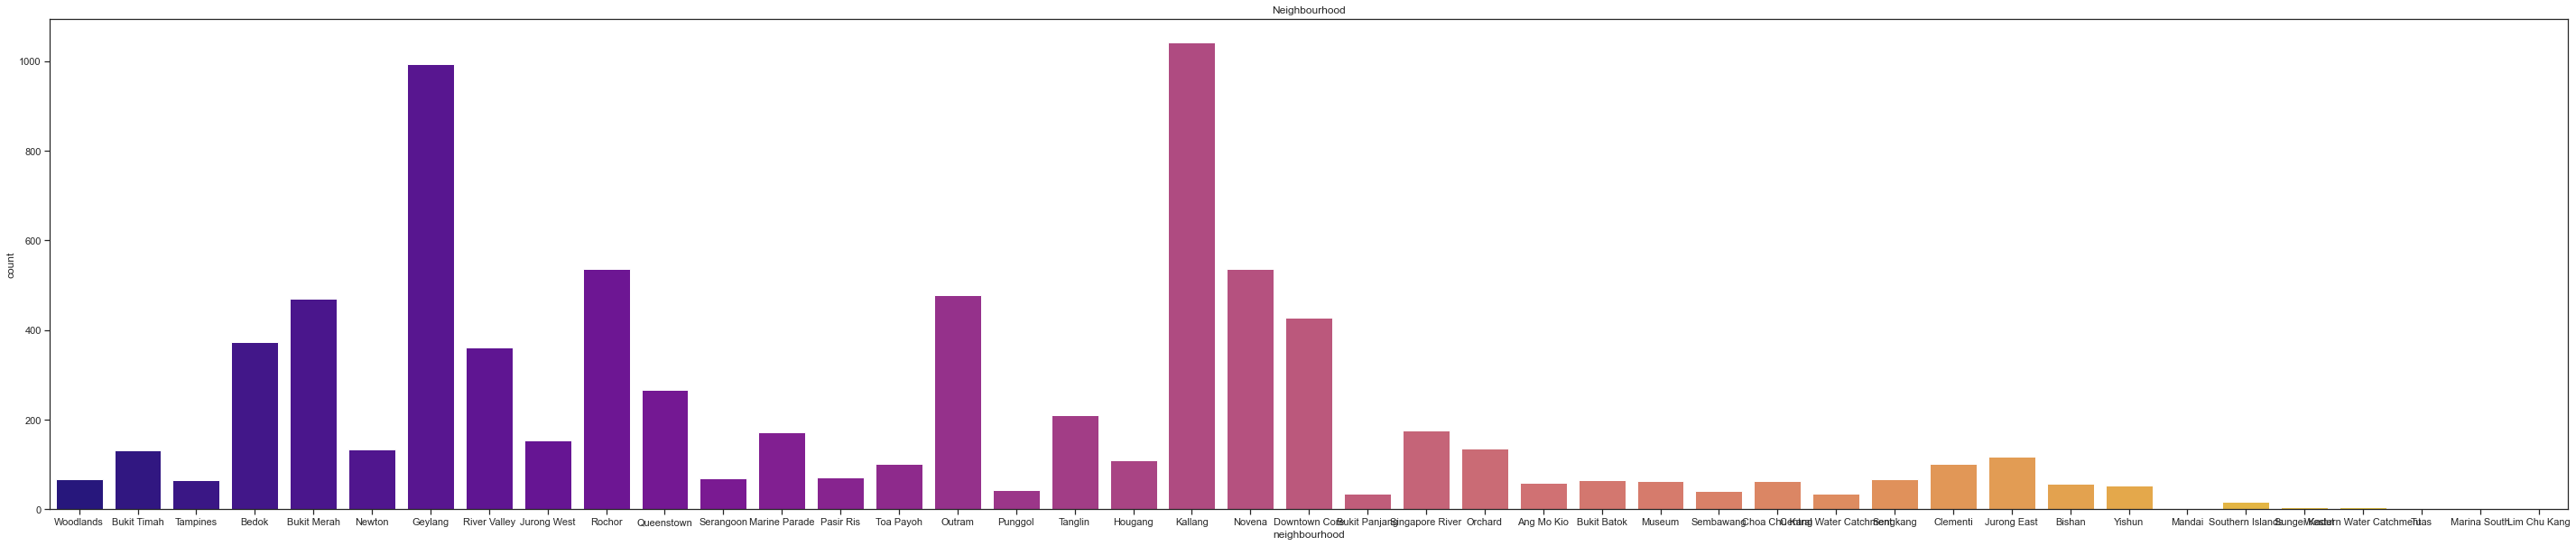

In [137]:
# Looking at distribution of neighbourhood
sns.countplot(df_airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(50,10)
plt.title('Neighbourhood')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

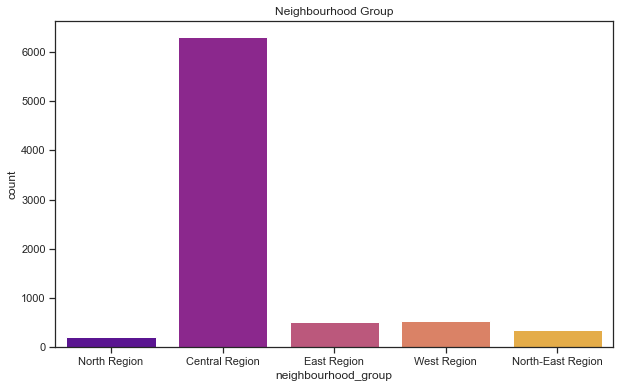

In [138]:
# Looking at distribution of neighbourhood grp
sns.countplot(df_airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Neighbourhood Group')

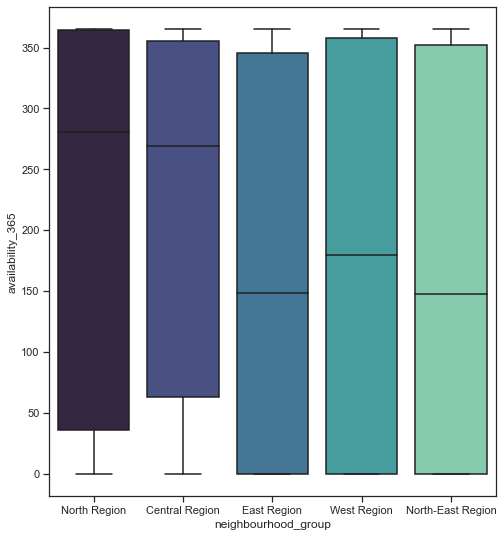

In [139]:
# Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(8,9))
ax = sns.boxplot(data=df_airbnb, x='neighbourhood_group',y='availability_365',palette='mako')

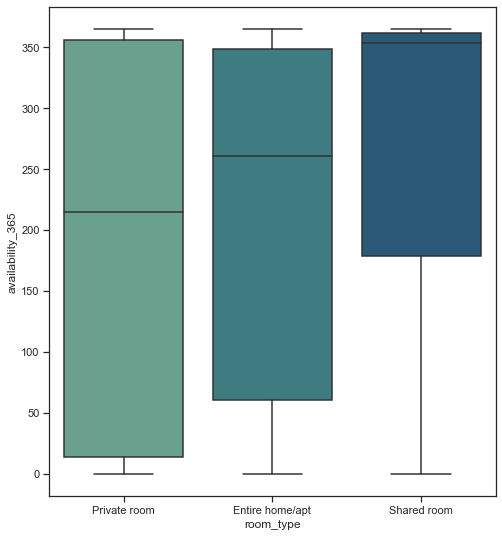

In [140]:
# Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(8,9))
ax = sns.boxplot(data=df_airbnb, x='room_type',y='availability_365',palette='crest')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


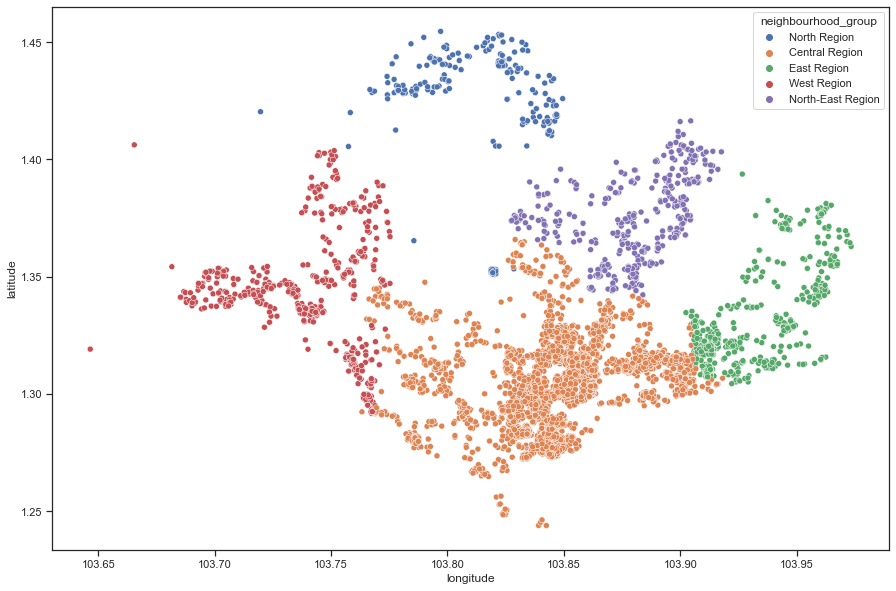

In [141]:
# Map of Neighbourhood group
plt.figure(figsize=(15,10))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.ioff()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


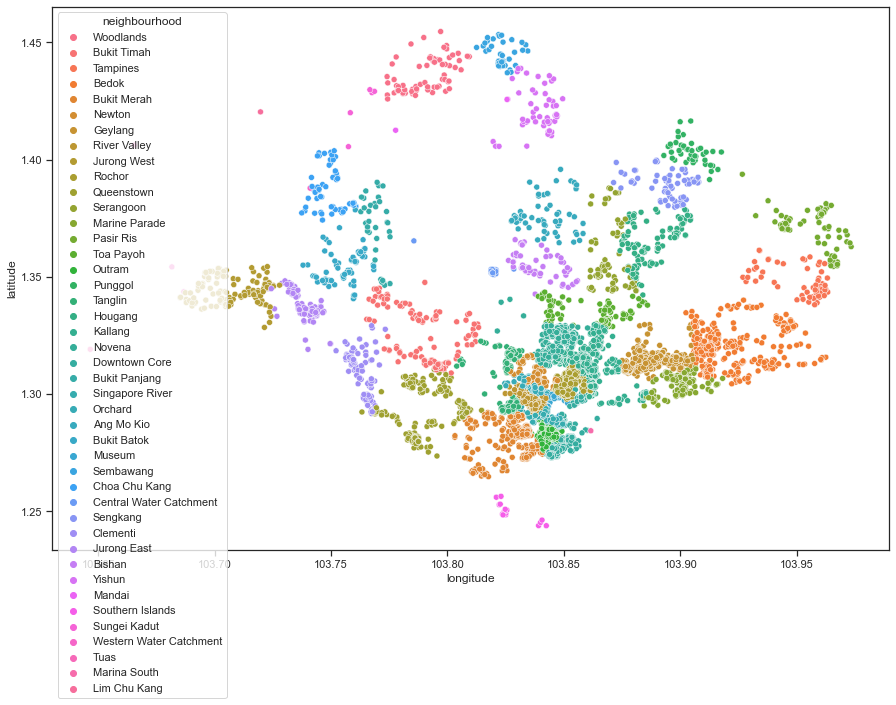

In [142]:
# map of neighborhood
plt.figure(figsize=(15,10))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood)
plt.ioff()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


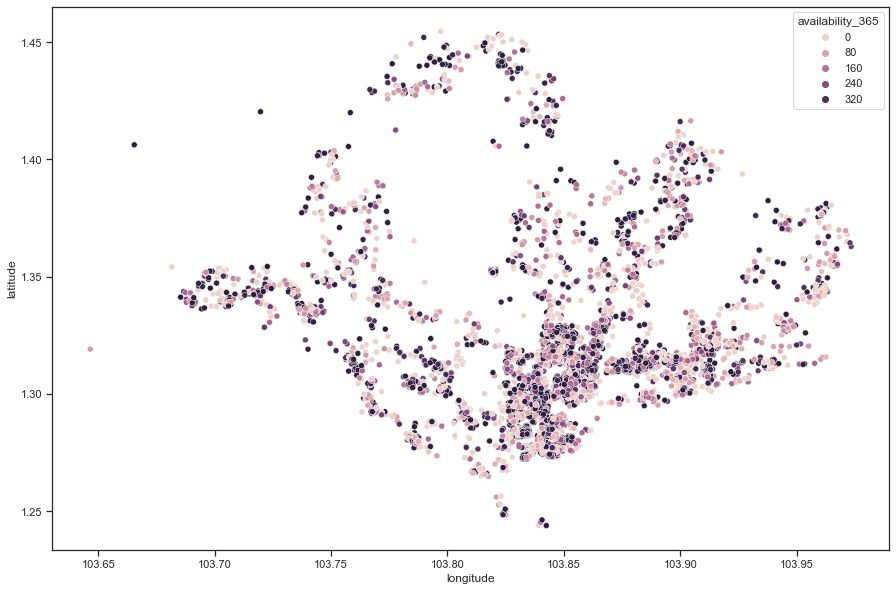

In [143]:
# Availability of Room
plt.figure(figsize=(15,10))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.availability_365)
plt.ioff()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


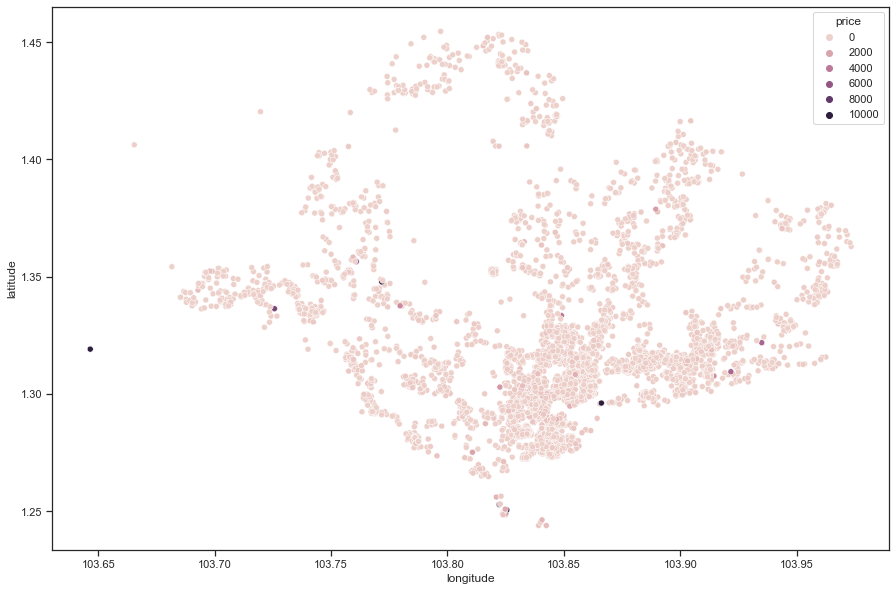

In [144]:
# Availability of Room
plt.figure(figsize=(15,10))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.price)
plt.ioff()

choosing to focus on central region to build the generic price model since most of the data is congregated there 

In [145]:
df_airbnb_subset = df_airbnb[df_airbnb["neighbourhood_group"]=="Central Region"]

In [146]:
# checking subset data
df_airbnb_subset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28875,103.80814,Private room,44,15,18,2019-04-21,0.23,32,331
11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28837,103.81099,Private room,40,30,10,2018-09-13,0.11,32,276
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,Newton,1.31125,103.83816,Private room,65,2,125,2019-08-22,1.35,6,336
14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28976,103.80896,Private room,44,30,13,2019-02-02,0.15,32,340


In [147]:
df_airbnb_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6309 entries, 1 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6309 non-null   int64  
 1   name                            6307 non-null   object 
 2   host_id                         6309 non-null   int64  
 3   host_name                       6309 non-null   object 
 4   neighbourhood_group             6309 non-null   object 
 5   neighbourhood                   6309 non-null   object 
 6   latitude                        6309 non-null   float64
 7   longitude                       6309 non-null   float64
 8   room_type                       6309 non-null   object 
 9   price                           6309 non-null   int64  
 10  minimum_nights                  6309 non-null   int64  
 11  number_of_reviews               6309 non-null   int64  
 12  last_review                     41

### 2.2 Cleanse and Transform the data

In [148]:
df_airbnb_subset.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2165
reviews_per_month                 2165
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [149]:
# retain the columns with a new value for reviews_per_month
# reviews_per_month Column: fill in null values by median value of reviews_per_month Column
df_airbnb_subset['reviews_per_month']=df_airbnb_subset['reviews_per_month'].fillna(df_airbnb_subset['reviews_per_month'].median())

C:\Users\shann\AppData\Local\Temp/ipykernel_24532/4255903530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_subset['reviews_per_month']=df_airbnb_subset['reviews_per_month'].fillna(df_airbnb_subset['reviews_per_month'].median())


In [150]:
#Drop unecessdary columns
df_airbnb_subset.drop(['id', 'name', 'host_name', 'host_id', 'neighbourhood_group', 'last_review'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [151]:
#examing changes
df_airbnb_subset.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [152]:
# check to see if the columns have been successfully removed 
df_airbnb_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6309 entries, 1 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   object 
 1   latitude                        6309 non-null   float64
 2   longitude                       6309 non-null   float64
 3   room_type                       6309 non-null   object 
 4   price                           6309 non-null   int64  
 5   minimum_nights                  6309 non-null   int64  
 6   number_of_reviews               6309 non-null   int64  
 7   reviews_per_month               6309 non-null   float64
 8   calculated_host_listings_count  6309 non-null   int64  
 9   availability_365                6309 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 542.2+ KB


In [153]:
df_airbnb_subset['room_type'].nunique()

3

#### Data Transformation 

##### Encoding Categorical Data 

In [154]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df_airbnb_subset.drop(labels=['price'], axis=1),  # predictors
    df_airbnb_subset['price'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((4416, 9), (1893, 9))

In [155]:
# using ordinal encoding for the categorical data (method #1)

In [156]:
# ordinal encoding [method #1]

In [157]:
# make a list with the categorical variables
# remaining categorical data as been identified above with .info()
vars_categorical = ['room_type']

In [158]:
# let's create the encoder
# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=vars_categorical)

In [159]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary', variables=['room_type'])

In [160]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['room_type']

In [161]:
# in the encoder dict we can observe the numbers --> see how each variable is encoded 
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'room_type': {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}}

In [162]:
# let's transform the train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [163]:
# let's explore the result

X_train.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6544,Kallang,1.31600,103.85716,0,5,0,0.58,114,358
5760,Downtown Core,1.30024,103.85846,0,30,1,0.26,8,262
6906,Novena,1.32737,103.85024,0,3,2,2.00,157,334
4336,Singapore River,1.29097,103.84122,0,2,5,0.43,78,359
732,Novena,1.32761,103.84858,1,1,0,0.58,1,365


In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4416 entries, 6544 to 3726
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   4416 non-null   object 
 1   latitude                        4416 non-null   float64
 2   longitude                       4416 non-null   float64
 3   room_type                       4416 non-null   int64  
 4   minimum_nights                  4416 non-null   int64  
 5   number_of_reviews               4416 non-null   int64  
 6   reviews_per_month               4416 non-null   float64
 7   calculated_host_listings_count  4416 non-null   int64  
 8   availability_365                4416 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 345.0+ KB


In [165]:
# Check your ordinal columns are aligned for both Train and Test Datasets
# avoiding downstream errors 
list(X_train.columns) == list(X_test.columns)

True

In [166]:
# using frequencey encoder for the rest of the categorical datab

In [167]:
# make a list with the categorical variables
# remaining categorical data as been identified above with .info()
freq_categorical = ['neighbourhood']

In [168]:
# let's create an encoder

freq_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=freq_categorical)

In [169]:
# fit the encoder to the train set
freq_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency', variables=['neighbourhood'])

In [170]:
# the encoder stores the variables it will encode

freq_enc.variables

['neighbourhood']

In [171]:
# in the encoder dict contains the counts or frequencies
# per category per variable

freq_enc.encoder_dict_

{'neighbourhood': {'Kallang': 0.16734601449275363,
  'Geylang': 0.15534420289855072,
  'Rochor': 0.08673007246376811,
  'Novena': 0.08469202898550725,
  'Outram': 0.07857789855072464,
  'Bukit Merah': 0.07201086956521739,
  'Downtown Core': 0.0661231884057971,
  'River Valley': 0.057291666666666664,
  'Queenstown': 0.042119565217391304,
  'Tanglin': 0.03283514492753623,
  'Singapore River': 0.028985507246376812,
  'Marine Parade': 0.0276268115942029,
  'Orchard': 0.022192028985507248,
  'Newton': 0.020380434782608696,
  'Bukit Timah': 0.019927536231884056,
  'Toa Payoh': 0.017889492753623188,
  'Museum': 0.00973731884057971,
  'Bishan': 0.007699275362318841,
  'Southern Islands': 0.0022644927536231885,
  'Marina South': 0.00022644927536231884}}

In [172]:
# let's transform train and test sets

X_train_enc = freq_enc.transform(X_train)
X_test_enc = freq_enc.transform(X_test)

In [173]:
# Check your freq columns are aligned for both Train and Test Datasets
# avoiding downstream errors 
list(X_train_enc.columns) == list(X_test_enc.columns)
X_train_enc.shape, X_test_enc.shape

((4416, 9), (1893, 9))

In [174]:
# checking to see if all categorical data is successfully encoded

In [175]:
X_train_enc.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6544,0.167346,1.31600,103.85716,0,5,0,0.58,114,358
5760,0.066123,1.30024,103.85846,0,30,1,0.26,8,262
6906,0.084692,1.32737,103.85024,0,3,2,2.00,157,334
4336,0.028986,1.29097,103.84122,0,2,5,0.43,78,359
732,0.084692,1.32761,103.84858,1,1,0,0.58,1,365


##### Numerical Transformation 

In [176]:
df_air_combined = pd.concat([X_train_enc, X_test_enc])
extracted_air_target = df_airbnb_subset['price']
df_air_combined = df_air_combined.join(extracted_air_target)

In [177]:
# reordered the rows to match the original for better comparison
df_air_combined.reset_index(drop=True, inplace=True)

In [178]:
df_air_combined.head(10)

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0.167346,1.31600,103.85716,0,5,0,0.58,114,358,119
1,0.066123,1.30024,103.85846,0,30,1,0.26,8,262,92
2,0.084692,1.32737,103.85024,0,3,2,2.00,157,334,178
3,0.028986,1.29097,103.84122,0,2,5,0.43,78,359,640
4,0.084692,1.32761,103.84858,1,1,0,0.58,1,365,219
5,0.066123,1.29680,103.85578,1,2,24,8.37,5,58,67
6,0.017889,1.33200,103.84861,1,1,4,0.33,2,0,69
7,0.017889,1.33381,103.87667,1,1,0,0.58,1,0,56
8,0.078578,1.28219,103.84425,1,1,7,2.23,6,343,181
9,0.042120,1.29154,103.76891,2,5,2,0.05,9,0,25


In [179]:
df_air_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   float64
 1   latitude                        6309 non-null   float64
 2   longitude                       6309 non-null   float64
 3   room_type                       6309 non-null   int64  
 4   minimum_nights                  6309 non-null   int64  
 5   number_of_reviews               6309 non-null   int64  
 6   reviews_per_month               6309 non-null   float64
 7   calculated_host_listings_count  6309 non-null   int64  
 8   availability_365                6309 non-null   int64  
 9   price                           6309 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 493.0 KB


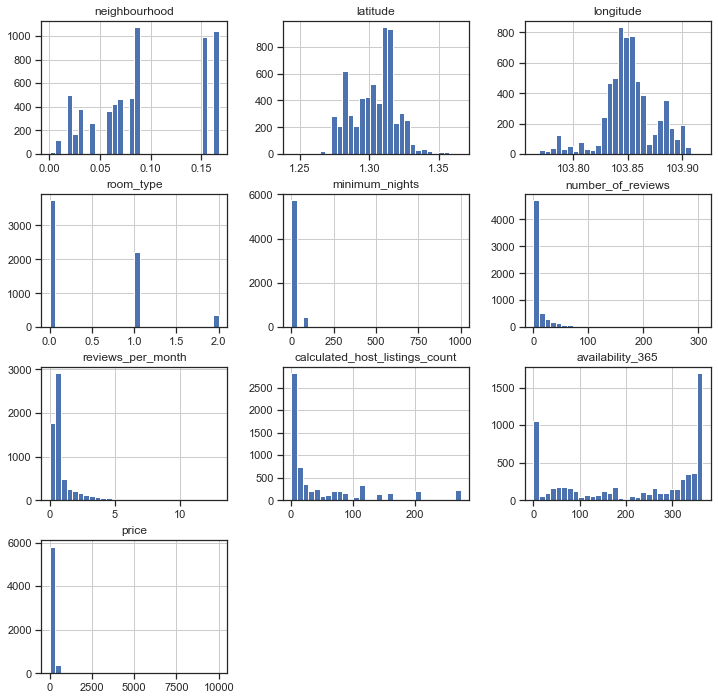

In [180]:
# plot the histogram to inspect variable distributions (not in book)
# choosing which ones are appliable to apply transformation on
df_air_combined.hist(bins=30, figsize=(12,12))
plt.show()

In [181]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# degree of skewness can be calculated using this def
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

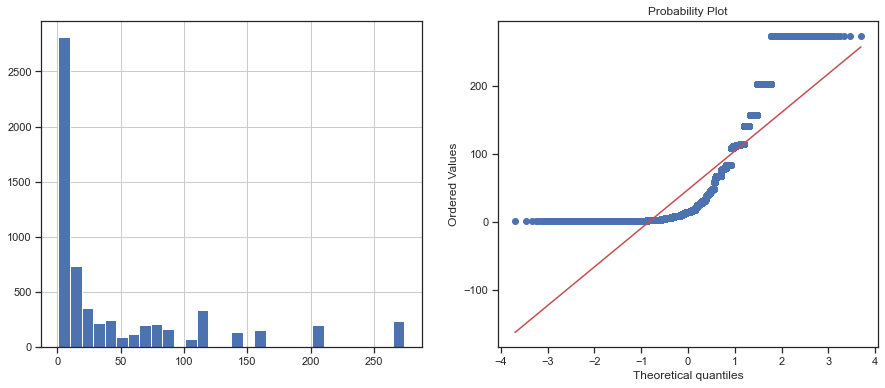

In [182]:
#checking original distribution 
diagnostic_plots(df_air_combined, 'calculated_host_listings_count')

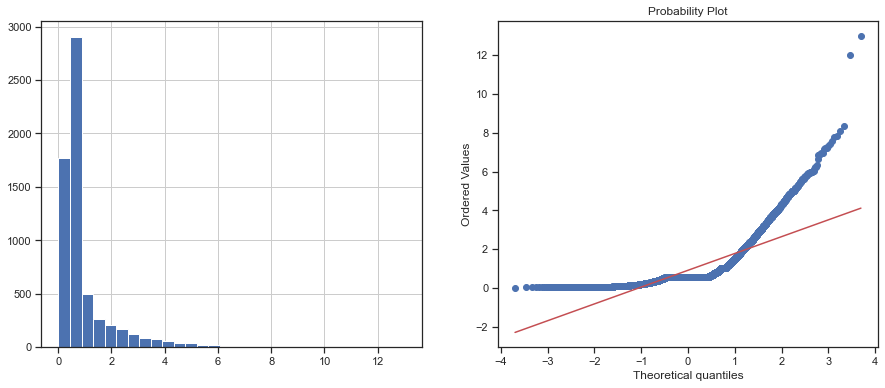

In [183]:
#checking original distribution 
diagnostic_plots(df_air_combined, 'reviews_per_month')

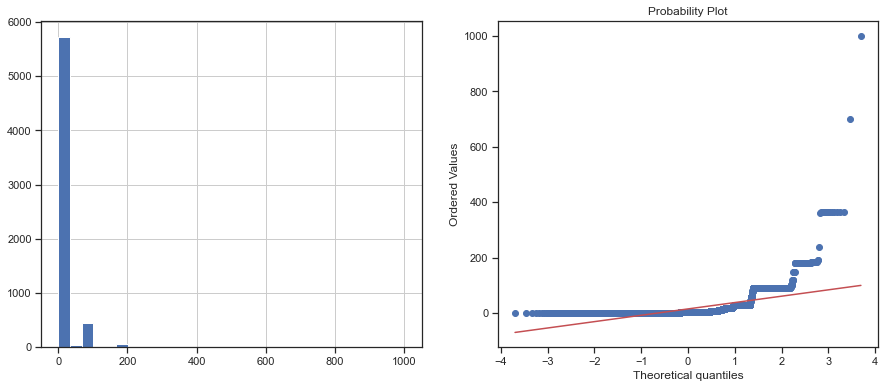

In [184]:
diagnostic_plots(df_air_combined, 'minimum_nights')
#very close to normal 

In [185]:
# method 1 (Log)

In [186]:
# initialize the transformer
lt = LogTransformer(variables=['calculated_host_listings_count', 'reviews_per_month', 'minimum_nights']) # numerical columns that we want to perform transformation on

# fit transformer to data set
lt.fit(df_air_combined)

LogTransformer(variables=['calculated_host_listings_count', 'reviews_per_month',
                          'minimum_nights'])

In [187]:
# transform variables within our data set
data_tf = lt.transform(df_air_combined) # entire distribution of whole numerical column so no need for split test train 

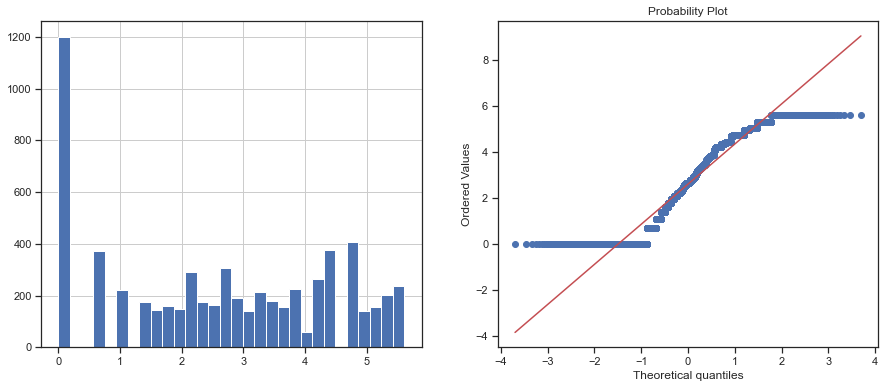

In [188]:
#checking original distribution 
diagnostic_plots(data_tf, 'calculated_host_listings_count')

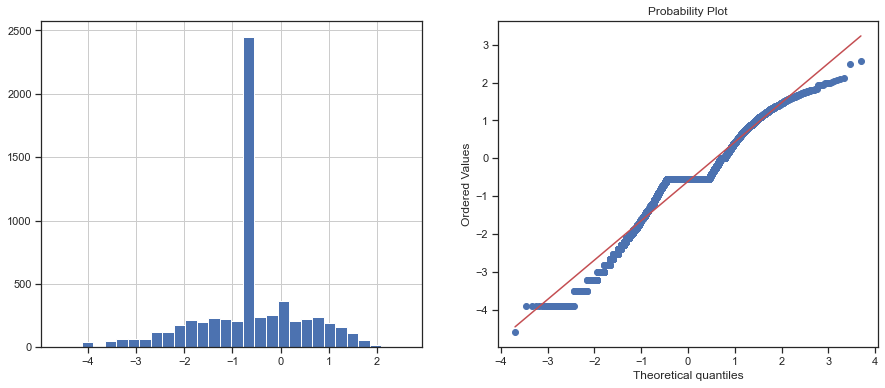

In [189]:
#checking original distribution 
diagnostic_plots(data_tf, 'reviews_per_month')

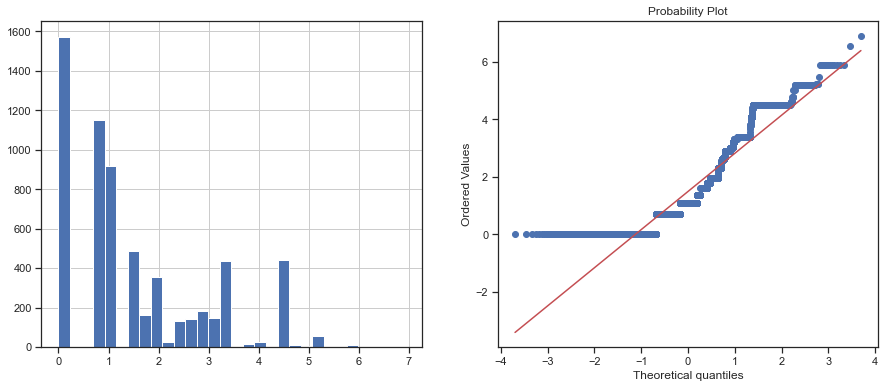

In [190]:
#checking original distribution 
diagnostic_plots(data_tf, 'minimum_nights')

In [191]:
# Reciprocal Transformer(method #2)

In [192]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['calculated_host_listings_count', 'reviews_per_month', 'minimum_nights'])

# fit transformer to the entire dataframe
rt.fit(df_air_combined)

ReciprocalTransformer(variables=['calculated_host_listings_count',
                                 'reviews_per_month', 'minimum_nights'])

In [193]:
# transform the indicated variables within our data set
data_rt = rt.transform(df_air_combined)

In [194]:
# looking at the effects of the transformer 

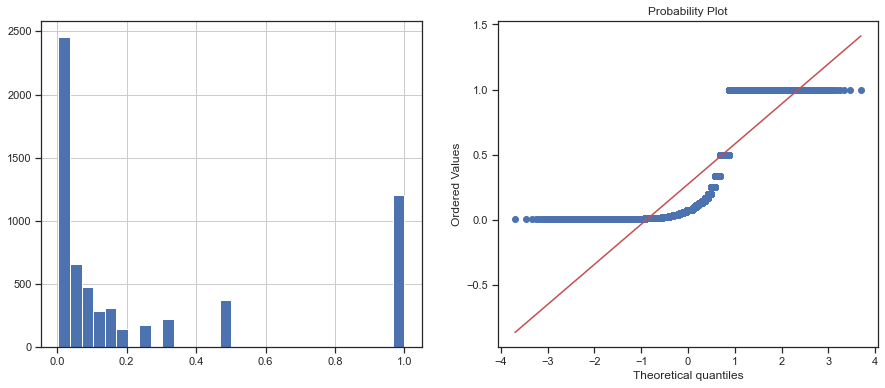

In [195]:
diagnostic_plots(data_rt, 'calculated_host_listings_count')
# not much change

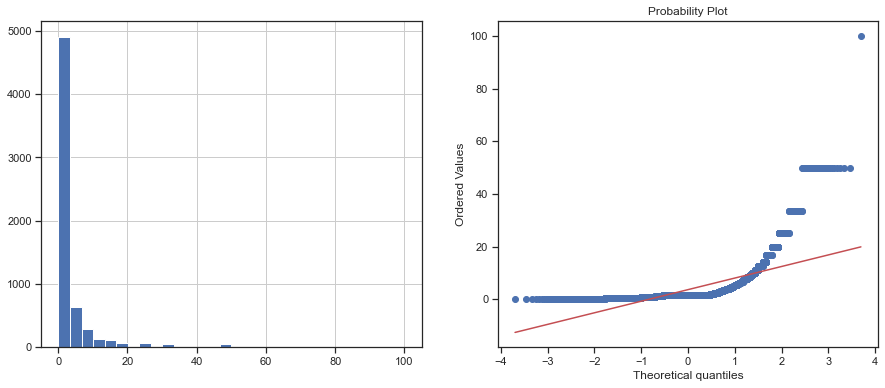

In [196]:
#checking original distribution 
diagnostic_plots(data_rt, 'reviews_per_month')

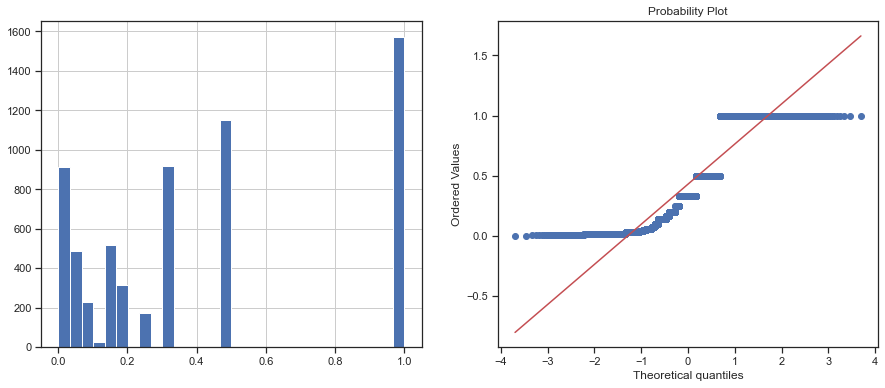

In [197]:
# examine changes 
diagnostic_plots(data_rt, 'minimum_nights')

In [198]:
# power transformer (method #3)

In [199]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['calculated_host_listings_count', 'reviews_per_month', 'minimum_nights'], exp=0.3)

# fit transformer to data
et.fit(df_air_combined)

PowerTransformer(exp=0.3,
                 variables=['calculated_host_listings_count',
                            'reviews_per_month', 'minimum_nights'])

In [200]:
# transform indicated variables in the dataset
data_pow = et.transform(df_air_combined)

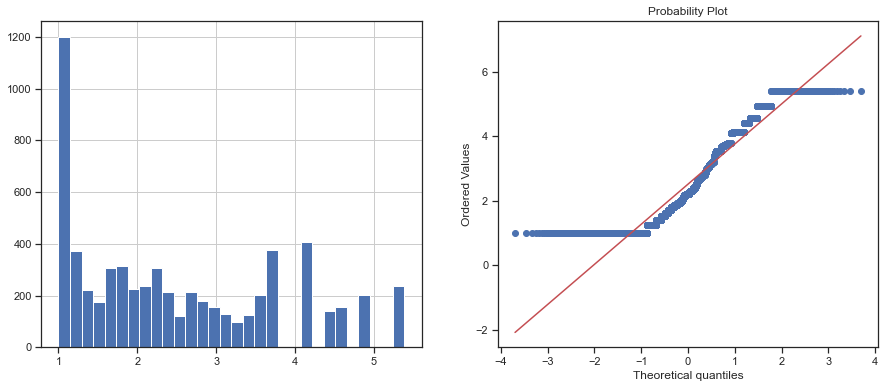

In [201]:
diagnostic_plots(data_pow, 'calculated_host_listings_count')
# very close to normal 

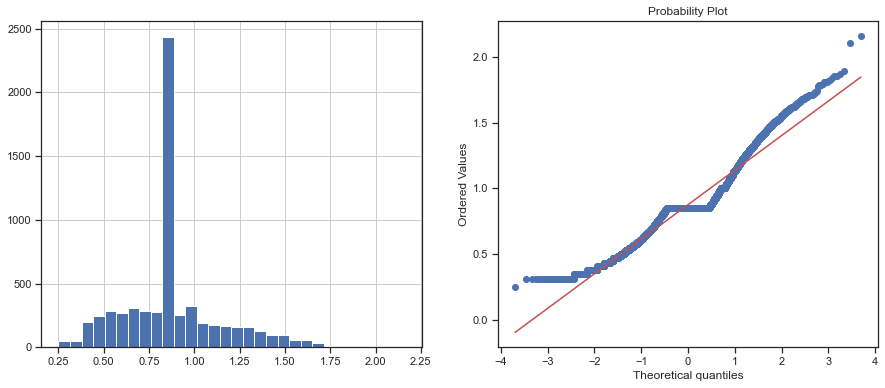

In [202]:

diagnostic_plots(data_pow, 'reviews_per_month')
# very close to normal 

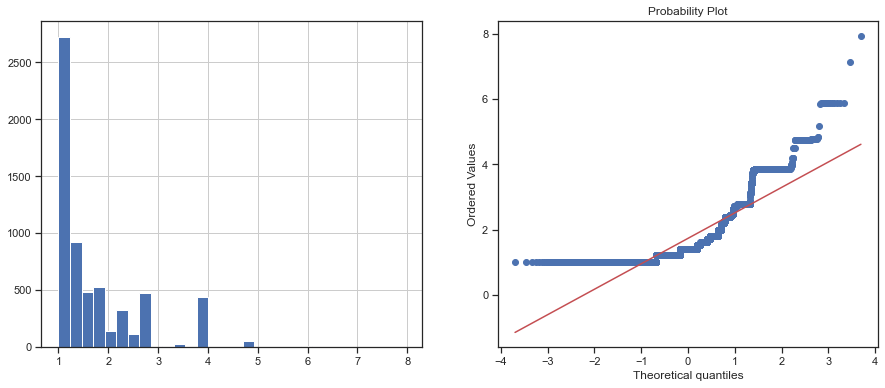

In [203]:
#check changes 
diagnostic_plots(data_pow, 'minimum_nights')

In [204]:
# box cox transformation (method #4)

In [205]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['calculated_host_listings_count', 'reviews_per_month', 'minimum_nights'])

# fit transformer to the data set
bct.fit(df_air_combined)

BoxCoxTransformer(variables=['calculated_host_listings_count',
                             'reviews_per_month', 'minimum_nights'])

In [206]:
# transform indicated variables in the dataset
data_bct = bct.transform(df_air_combined)

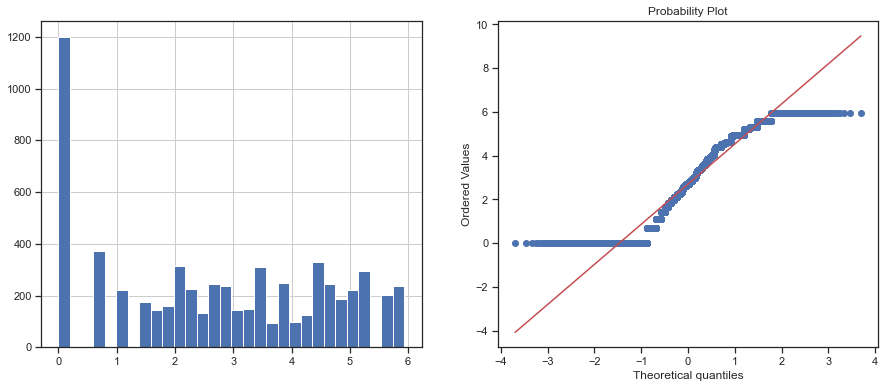

In [207]:
diagnostic_plots(data_bct, 'calculated_host_listings_count')
#very close to normal 

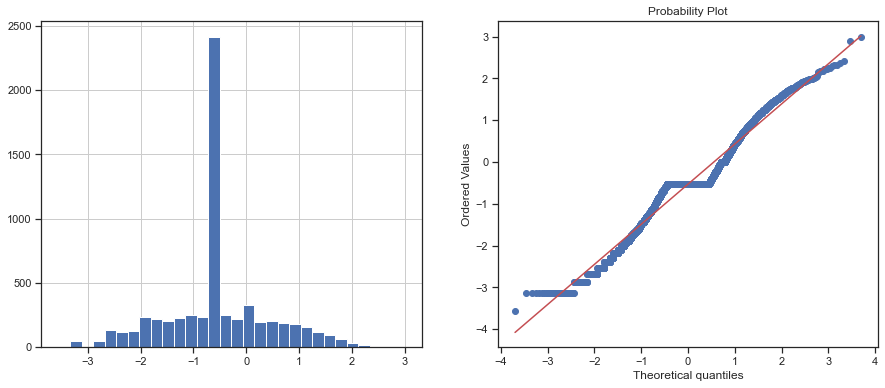

In [208]:
#checking original distribution 
diagnostic_plots(data_bct, 'reviews_per_month')

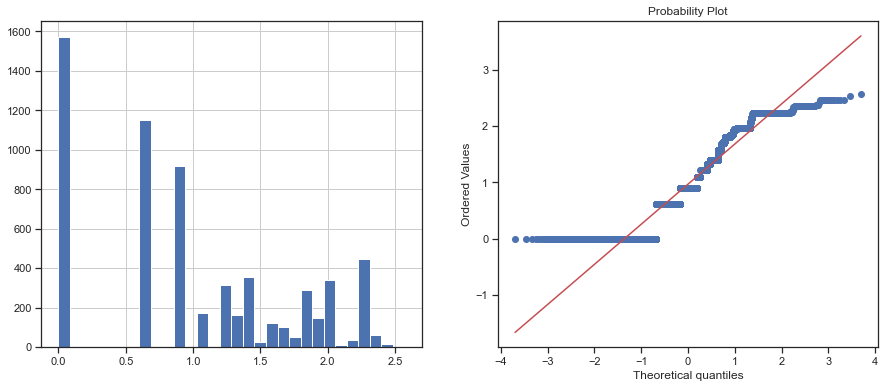

In [209]:
diagnostic_plots(data_bct, 'minimum_nights')
#very close to normal 

In [210]:
# using box cox transformation for all columns 

In [211]:
data_bct.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0.167346,1.31600,103.85716,0,1.225094,0,-0.527652,4.965264,358,119
1,0.066123,1.30024,103.85846,0,1.971941,1,-1.245826,2.122822,262,92
2,0.084692,1.32737,103.85024,0,0.909227,2,0.722171,5.317876,334,178
3,0.028986,1.29097,103.84122,0,0.614239,5,-0.803453,4.550045,359,640
4,0.084692,1.32761,103.84858,1,0.000000,0,-0.527652,0.000000,365,219


In [212]:
data_bct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   float64
 1   latitude                        6309 non-null   float64
 2   longitude                       6309 non-null   float64
 3   room_type                       6309 non-null   int64  
 4   minimum_nights                  6309 non-null   float64
 5   number_of_reviews               6309 non-null   int64  
 6   reviews_per_month               6309 non-null   float64
 7   calculated_host_listings_count  6309 non-null   float64
 8   availability_365                6309 non-null   int64  
 9   price                           6309 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 493.0 KB


##### Working with Outliers

In [213]:
# drop outliers such as high selling price or mistake in transaction

In [214]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Columnm quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


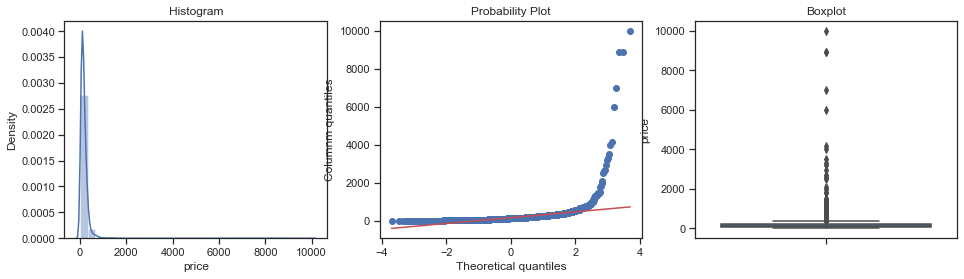

In [215]:
# let's find outliers in price

diagnostic_plots(data_bct, 'price')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


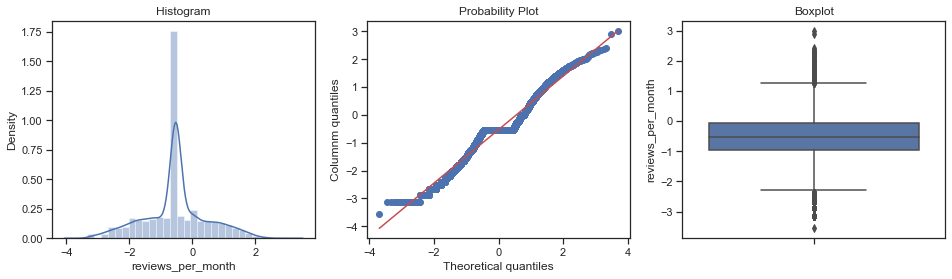

In [216]:
# let's find outliers in price

diagnostic_plots(data_bct, 'reviews_per_month')

In [217]:
# create the capper

windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['price', 'reviews_per_month'])

windsorizer.fit(data_bct)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['price', 'reviews_per_month'])

In [218]:
data_t = windsorizer.transform(data_bct)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


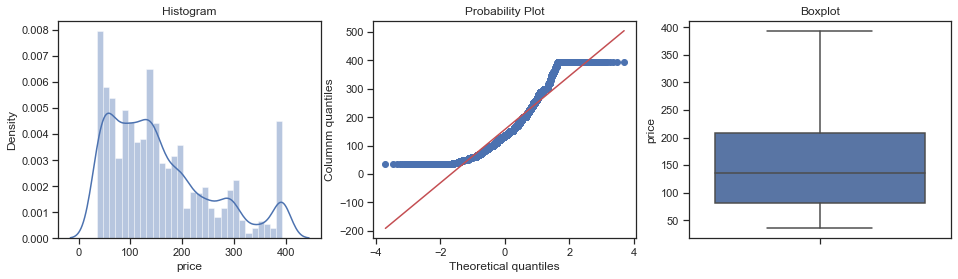

In [219]:
# examining the changes 
diagnostic_plots(data_t, 'price')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


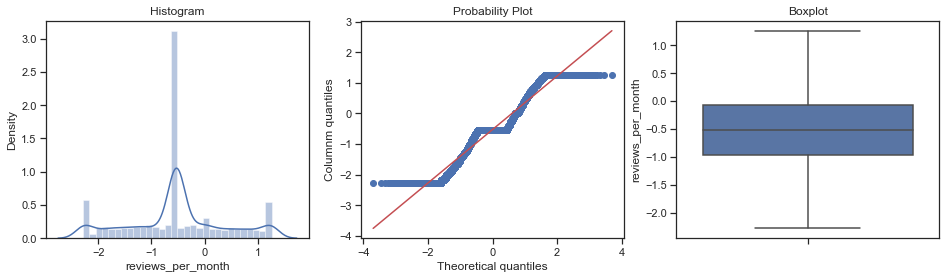

In [220]:
# examining the changes 
diagnostic_plots(data_t, 'reviews_per_month')

### 2.3 Correlation Analysis

In [221]:
df_final2 = data_t.copy()

In [222]:
df_final2.head(10)

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0.167346,1.31600,103.85716,0,1.225094,0,-0.527652,4.965264,358,119.0
1,0.066123,1.30024,103.85846,0,1.971941,1,-1.245826,2.122822,262,92.0
2,0.084692,1.32737,103.85024,0,0.909227,2,0.722171,5.317876,334,178.0
3,0.028986,1.29097,103.84122,0,0.614239,5,-0.803453,4.550045,359,394.0
4,0.084692,1.32761,103.84858,1,0.000000,0,-0.527652,0.000000,365,219.0
5,0.066123,1.29680,103.85578,1,0.614239,24,1.260680,1.635344,58,67.0
6,0.017889,1.33200,103.84861,1,0.000000,4,-1.039454,0.697923,0,69.0
7,0.017889,1.33381,103.87667,1,0.000000,0,-0.527652,0.000000,0,56.0
8,0.078578,1.28219,103.84425,1,0.000000,7,0.841026,1.823906,343,181.0
9,0.042120,1.29154,103.76891,2,1.225094,2,-2.283722,2.245697,0,35.0


In [223]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   float64
 1   latitude                        6309 non-null   float64
 2   longitude                       6309 non-null   float64
 3   room_type                       6309 non-null   int64  
 4   minimum_nights                  6309 non-null   float64
 5   number_of_reviews               6309 non-null   int64  
 6   reviews_per_month               6309 non-null   float64
 7   calculated_host_listings_count  6309 non-null   float64
 8   availability_365                6309 non-null   int64  
 9   price                           6309 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 493.0 KB


In [224]:
df_final2.describe()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000
mean,0.092002,1.303630,103.850989,0.462672,0.968999,13.037724,-0.526992,2.697315,215.435727,156.292281
std,0.052387,0.016459,0.025049,0.599151,0.747141,29.313302,0.903554,1.901781,143.593737,98.722597
min,0.000226,1.243870,103.763270,0.000000,0.000000,0.000000,-2.283722,0.000000,0.000000,35.000000
25%,0.057292,1.290980,103.839270,0.000000,0.614239,0.000000,-0.962683,1.110642,63.000000,81.000000
50%,0.078578,1.306000,103.849320,0.000000,0.909227,2.000000,-0.527652,2.709189,269.000000,135.000000
75%,0.155344,1.314480,103.862200,1.000000,1.571413,11.000000,-0.072262,4.384589,355.000000,208.000000
max,0.167346,1.365830,103.918220,2.000000,2.568582,307.000000,1.260680,5.936771,365.000000,394.000000


In [225]:
# This shows the correlations between the variables
df_final2.corr()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
neighbourhood,1.000000,0.319525,0.596575,-0.026434,0.001835,-0.010448,0.008063,0.207539,0.052260,-0.077659
latitude,0.319525,1.000000,0.322695,-0.052208,-0.000884,0.004044,-0.007238,0.024376,-0.017838,-0.034184
longitude,0.596575,0.322695,1.000000,-0.085764,-0.057142,0.075162,0.091251,0.148321,-0.038544,-0.020659
room_type,-0.026434,-0.052208,-0.085764,1.000000,-0.256399,0.024740,-0.065233,-0.274519,0.053226,-0.549689
minimum_nights,0.001835,-0.000884,-0.057142,-0.256399,1.000000,-0.182177,-0.206677,0.275742,0.174336,-0.023121
number_of_reviews,-0.010448,0.004044,0.075162,0.024740,-0.182177,1.000000,0.524133,-0.128383,-0.082979,-0.062517
reviews_per_month,0.008063,-0.007238,0.091251,-0.065233,-0.206677,0.524133,1.000000,-0.083940,-0.059555,0.057984
calculated_host_listings_count,0.207539,0.024376,0.148321,-0.274519,0.275742,-0.128383,-0.083940,1.000000,0.445338,0.125657
availability_365,0.052260,-0.017838,-0.038544,0.053226,0.174336,-0.082979,-0.059555,0.445338,1.000000,0.094824
price,-0.077659,-0.034184,-0.020659,-0.549689,-0.023121,-0.062517,0.057984,0.125657,0.094824,1.000000


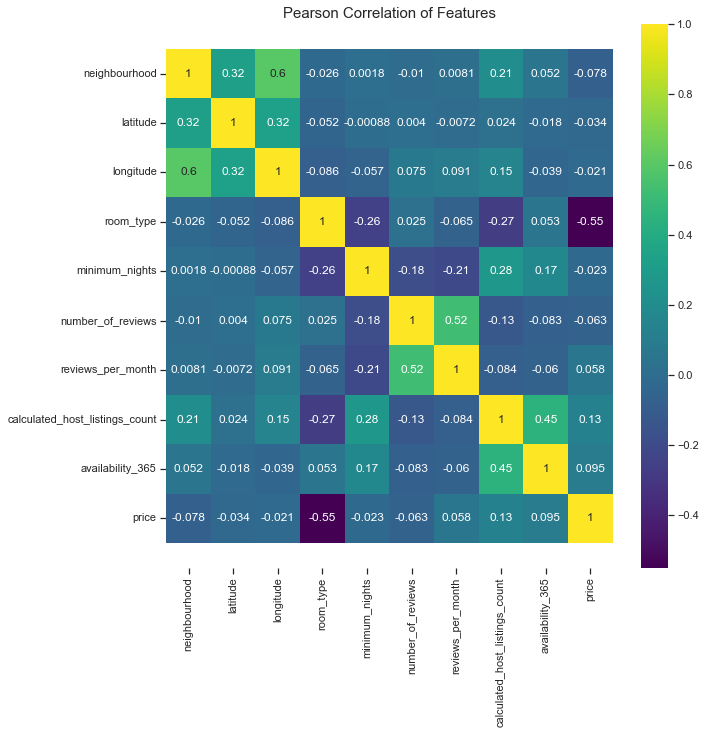

In [226]:
# Heatmap: the correlation between any two features/variables
# only for data understanding so do not use this as a basis to drop, try to just drop irrelevant columns beforehand 
# for assignments (not many features), just keep them, use model detail to drop when key values hav been identified
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_final2.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Data Dictionary : 

* **price (Target):** daily rental price in dollars
* **neighbourhood:** sub region, 0 ~ 1 i.e. the percentile of each neighbourhood
* **latitude:** latitude coordinates
* **longitude:** longitude coordinates
* **room_type:** listing space type, 'entire home/apt' = 0, 'private room' = 1, 'shared room' = 2
* **minimum_nights:** amount of nights minimum, 0 ~ 2.5 i.e. the percentile of minimum nights a customer stays at an airbnb
* **number_of_reviews:** number of reviews, 0 ~ 226
* **reviews_per_month:** number of reviews per month, -1 ~ 2
* **calculated_host_listings_count:** amount of listing per host, 0 ~ 5
* **availability_365:** number of days when listing is available for booking

### 2.4 Export the data

In [227]:
df_final2.to_csv("listings_new.csv", encoding='utf-8', index=False)